In [178]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/Machine Learning/Class Lectures/Tutorial/Heart Disease Analysis/heart_2020_cleaned.csv')

In [181]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [182]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [183]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
No,292422
Yes,27373


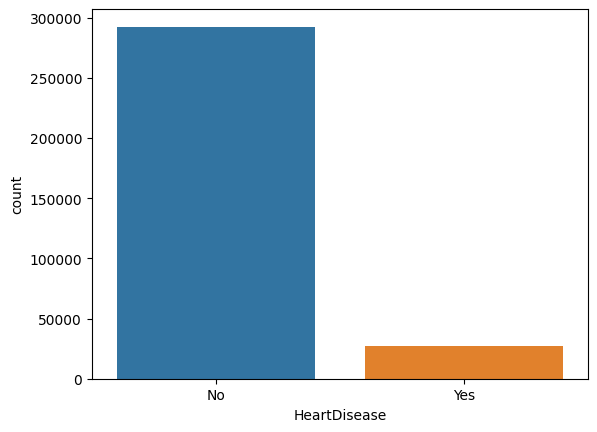

In [184]:
sns.countplot(data=df,x='HeartDisease',hue='HeartDisease')
plt.show()

#sample is highly unbalanced

In [185]:
for cols in df.columns:
  print('Feature {} has {} unique values'.format(cols,df[cols].value_counts().index.nunique()))

Feature HeartDisease has 2 unique values
Feature BMI has 3604 unique values
Feature Smoking has 2 unique values
Feature AlcoholDrinking has 2 unique values
Feature Stroke has 2 unique values
Feature PhysicalHealth has 31 unique values
Feature MentalHealth has 31 unique values
Feature DiffWalking has 2 unique values
Feature Sex has 2 unique values
Feature AgeCategory has 13 unique values
Feature Race has 6 unique values
Feature Diabetic has 4 unique values
Feature PhysicalActivity has 2 unique values
Feature GenHealth has 5 unique values
Feature SleepTime has 24 unique values
Feature Asthma has 2 unique values
Feature KidneyDisease has 2 unique values
Feature SkinCancer has 2 unique values


In [186]:
numerical_features=['BMI','PhysicalHealth','MentalHealth','SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

#UNIVARIATE ANALYSIS

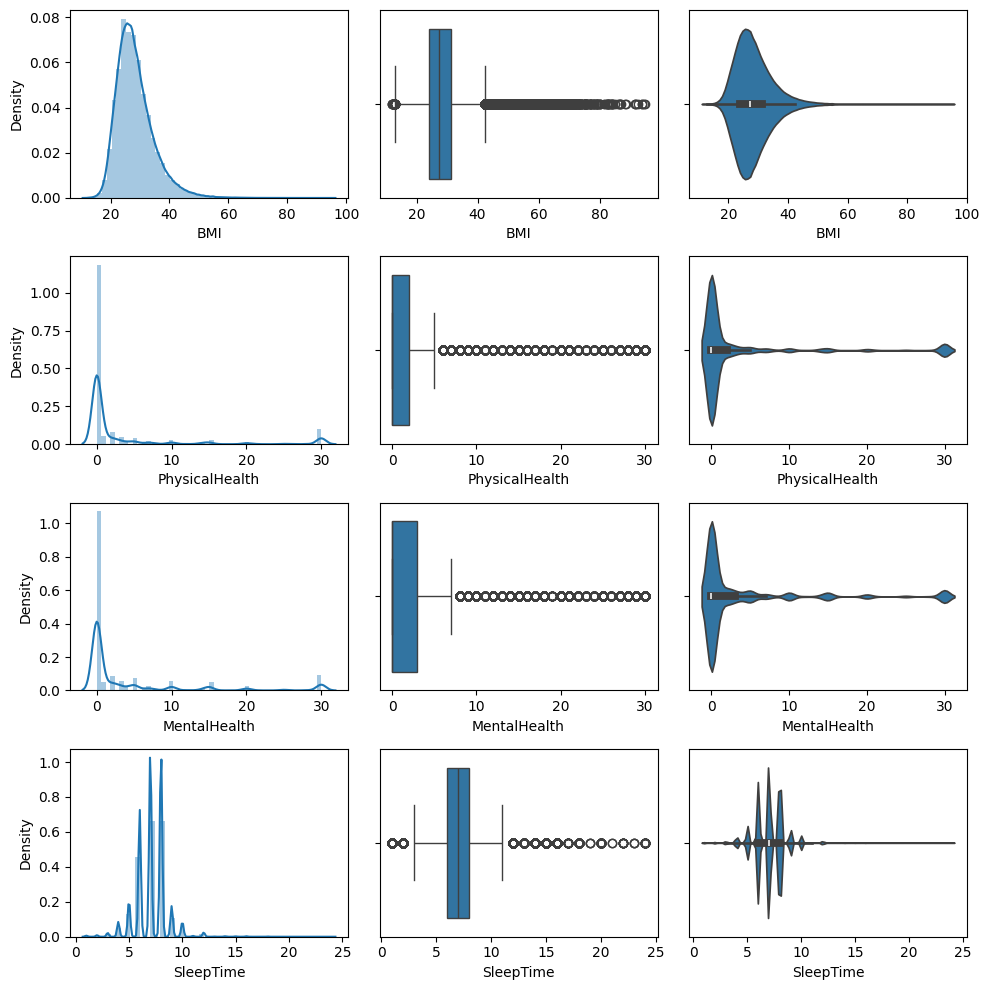

In [187]:
fig,ax= plt.subplots(4,3,figsize=(10,10))
for index,feature in enumerate(numerical_features):
  sns.distplot(df[feature],ax=ax[index][0]);
  sns.boxplot(df[feature],ax=ax[index][1],orient='h');
  sns.violinplot(df[feature],ax=ax[index][2],orient='h');
fig.tight_layout()
plt.show()

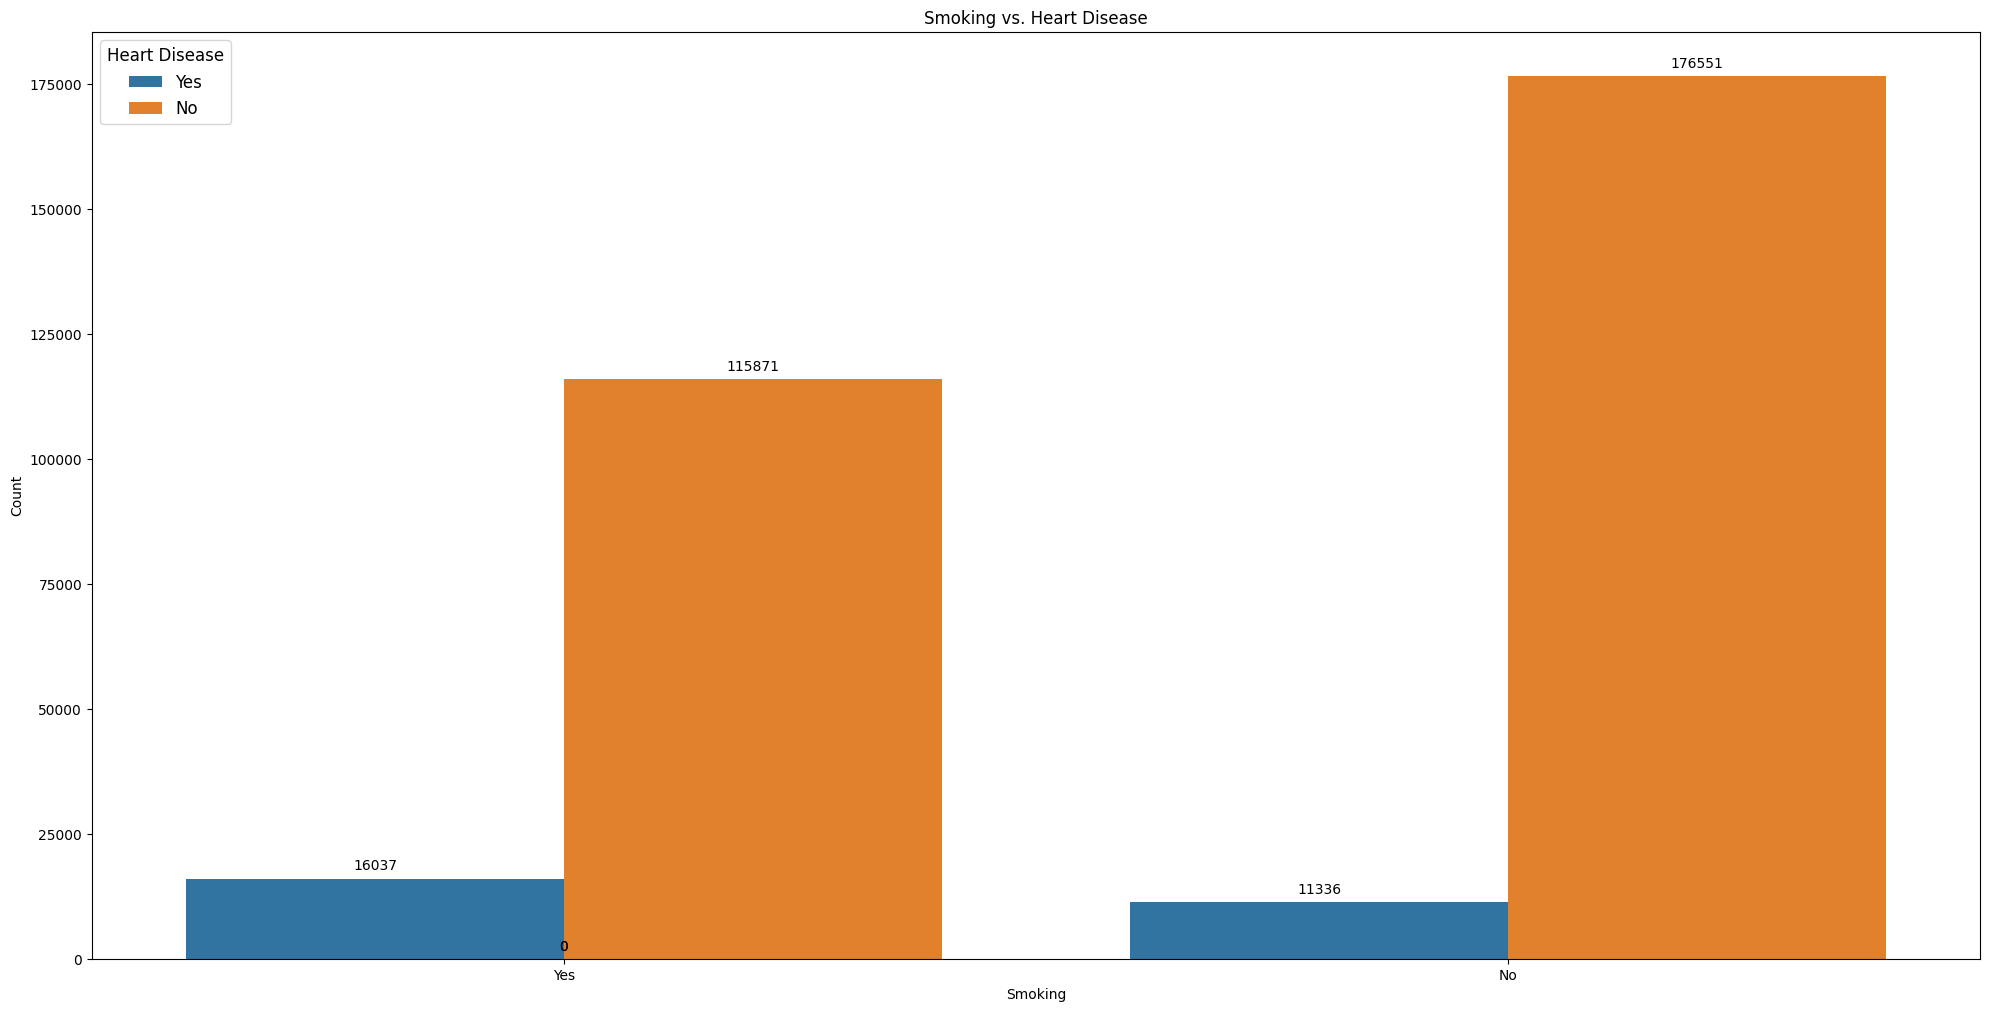

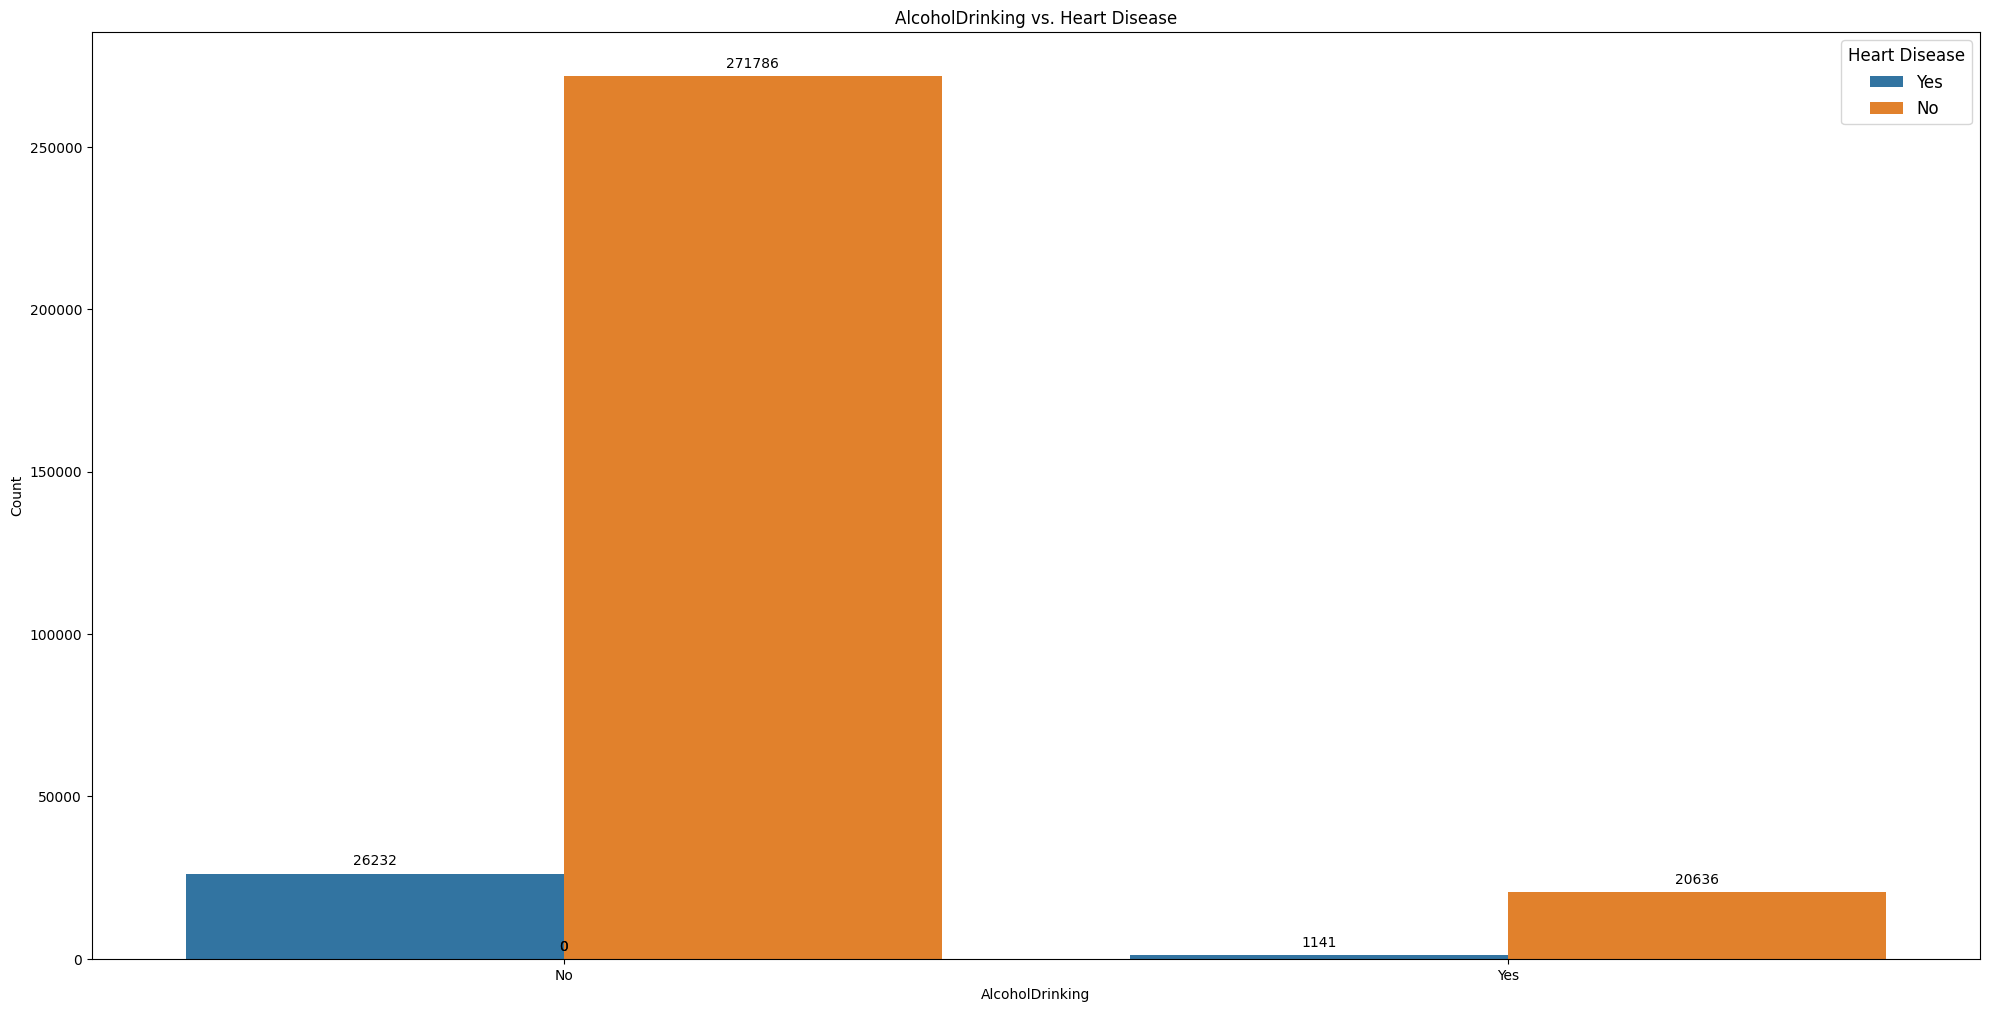

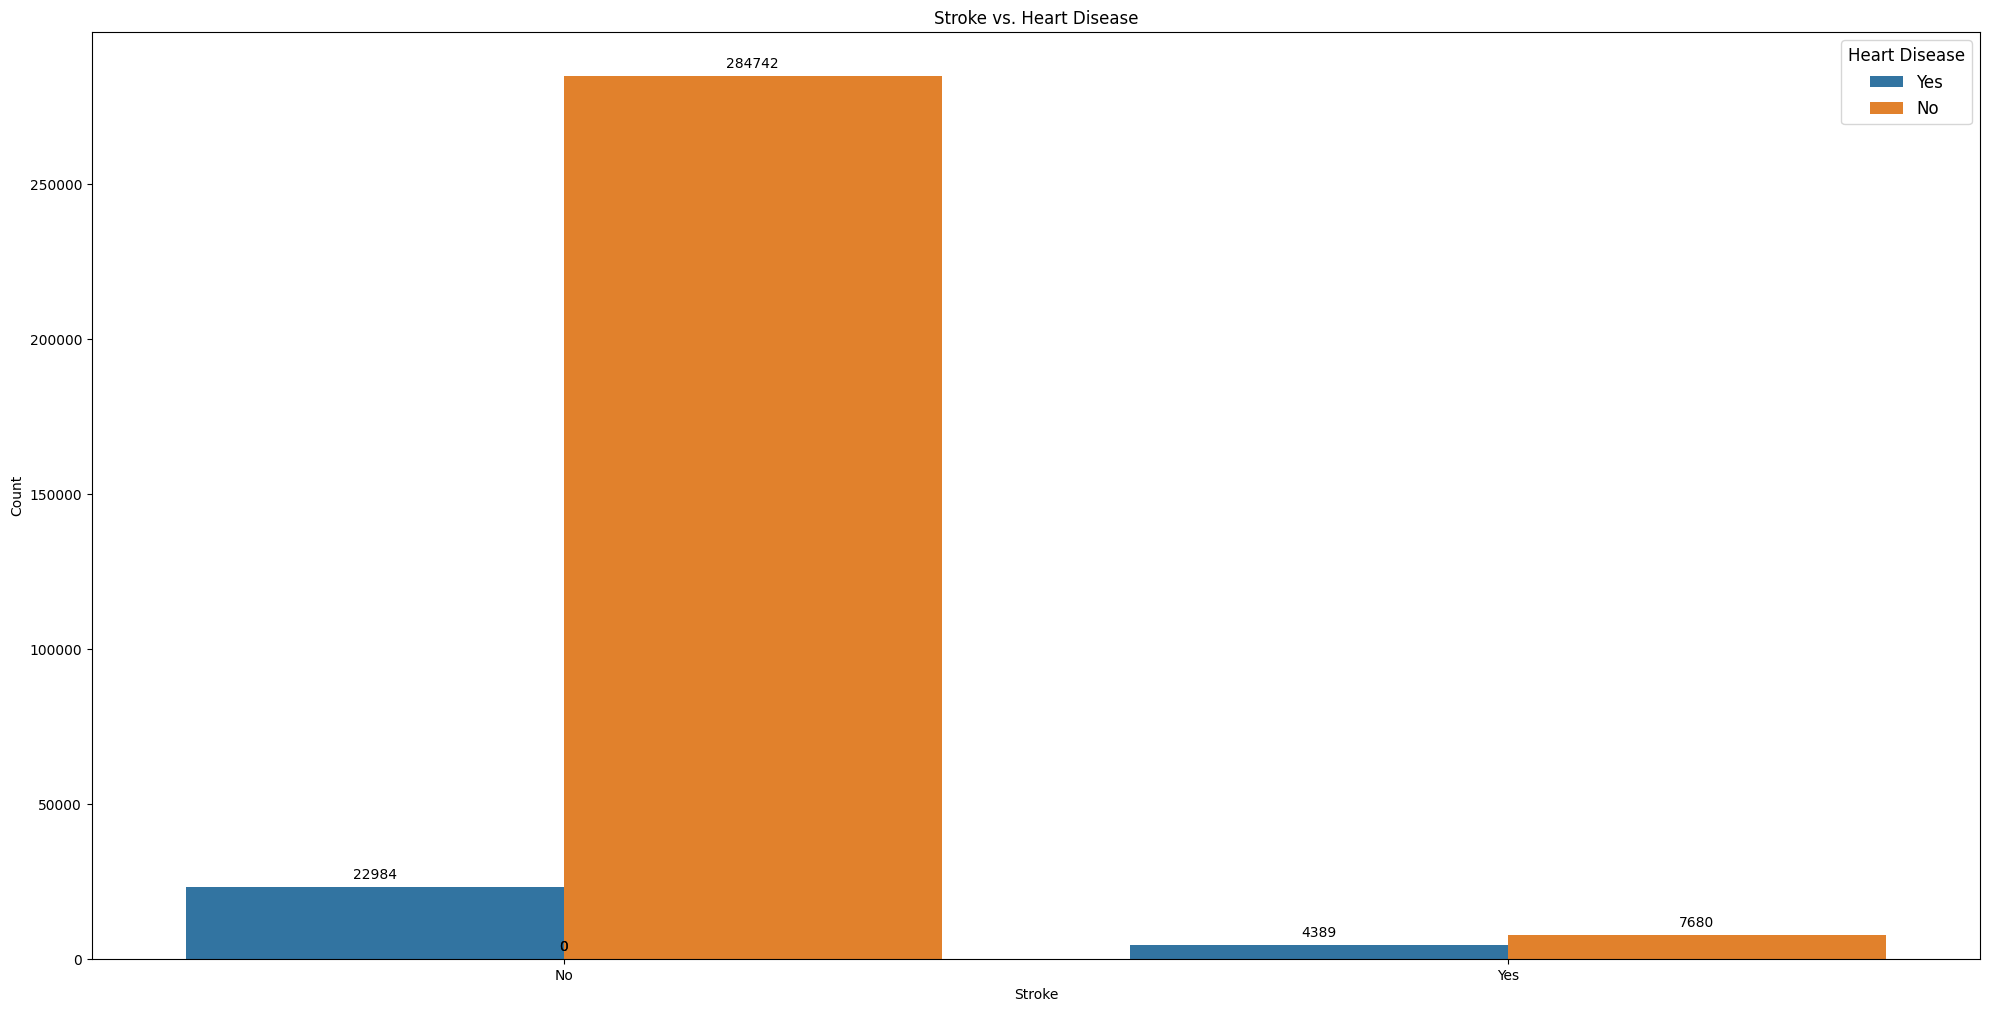

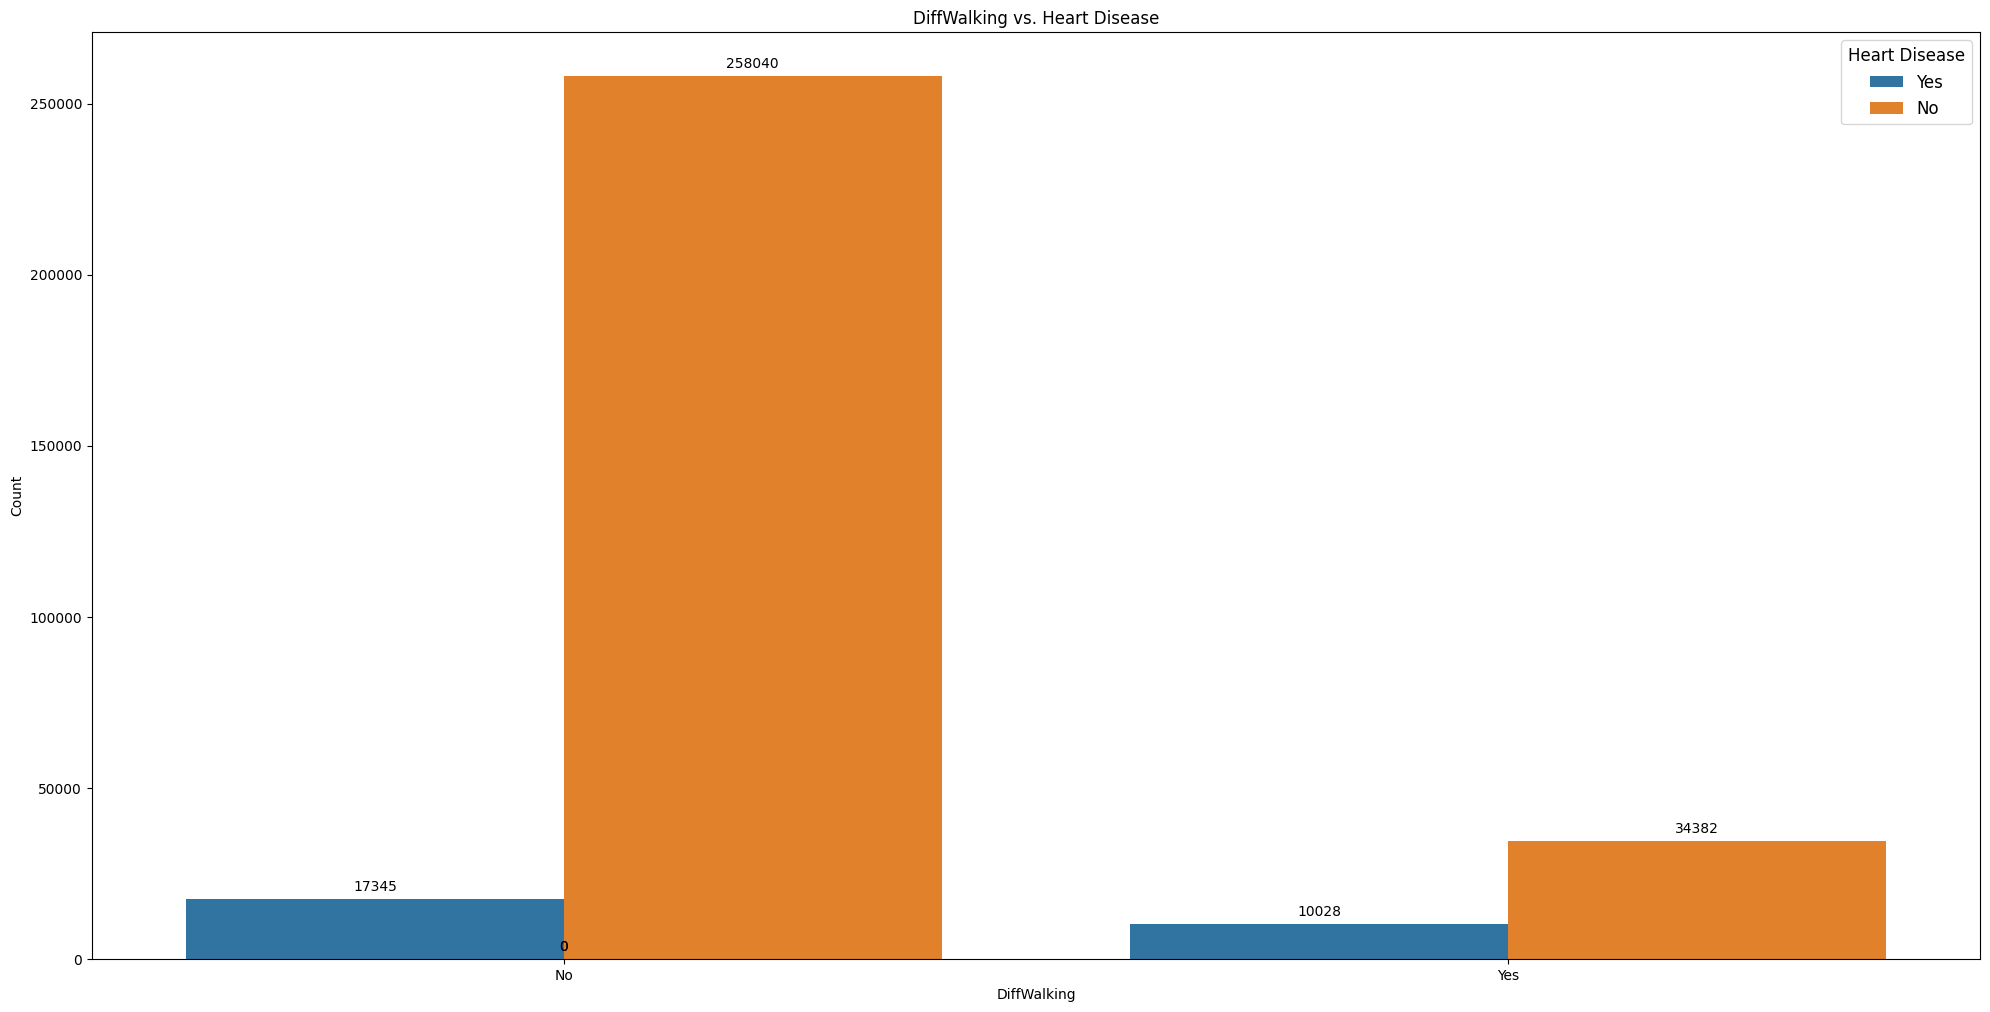

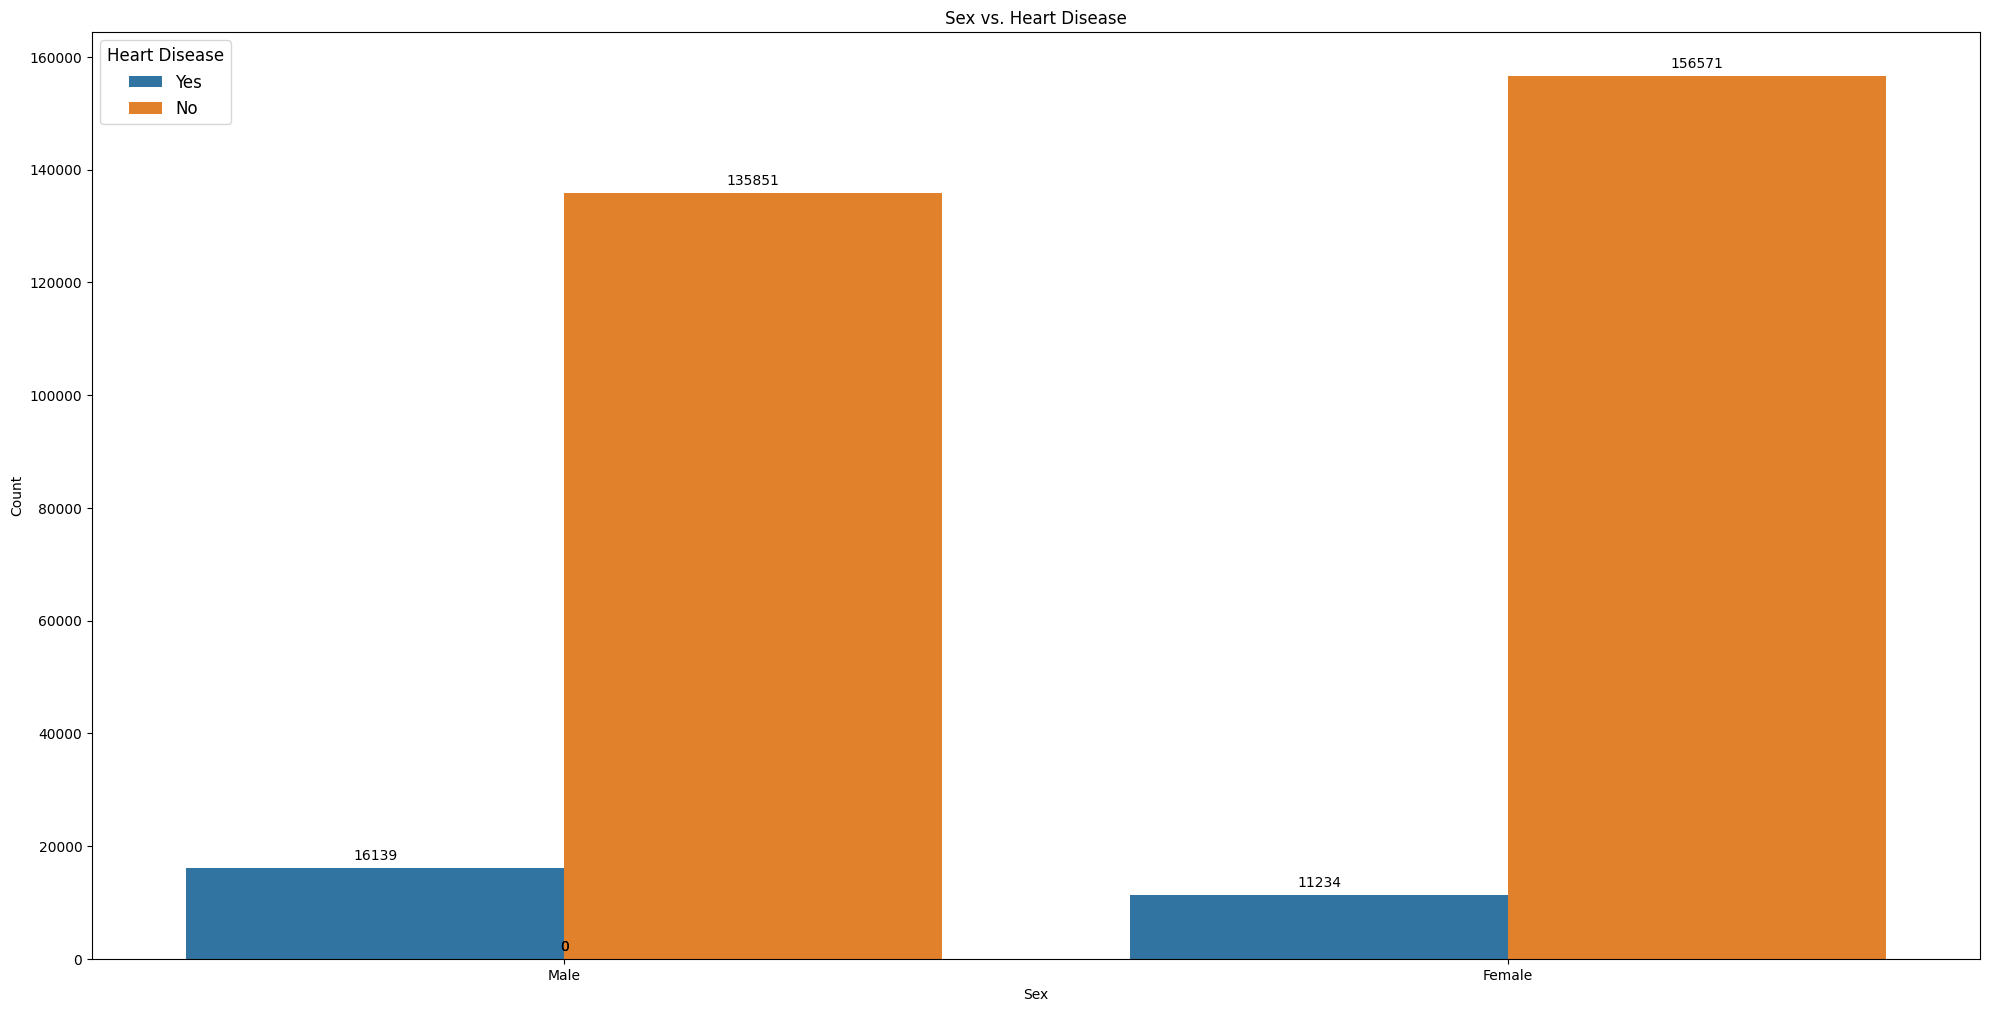

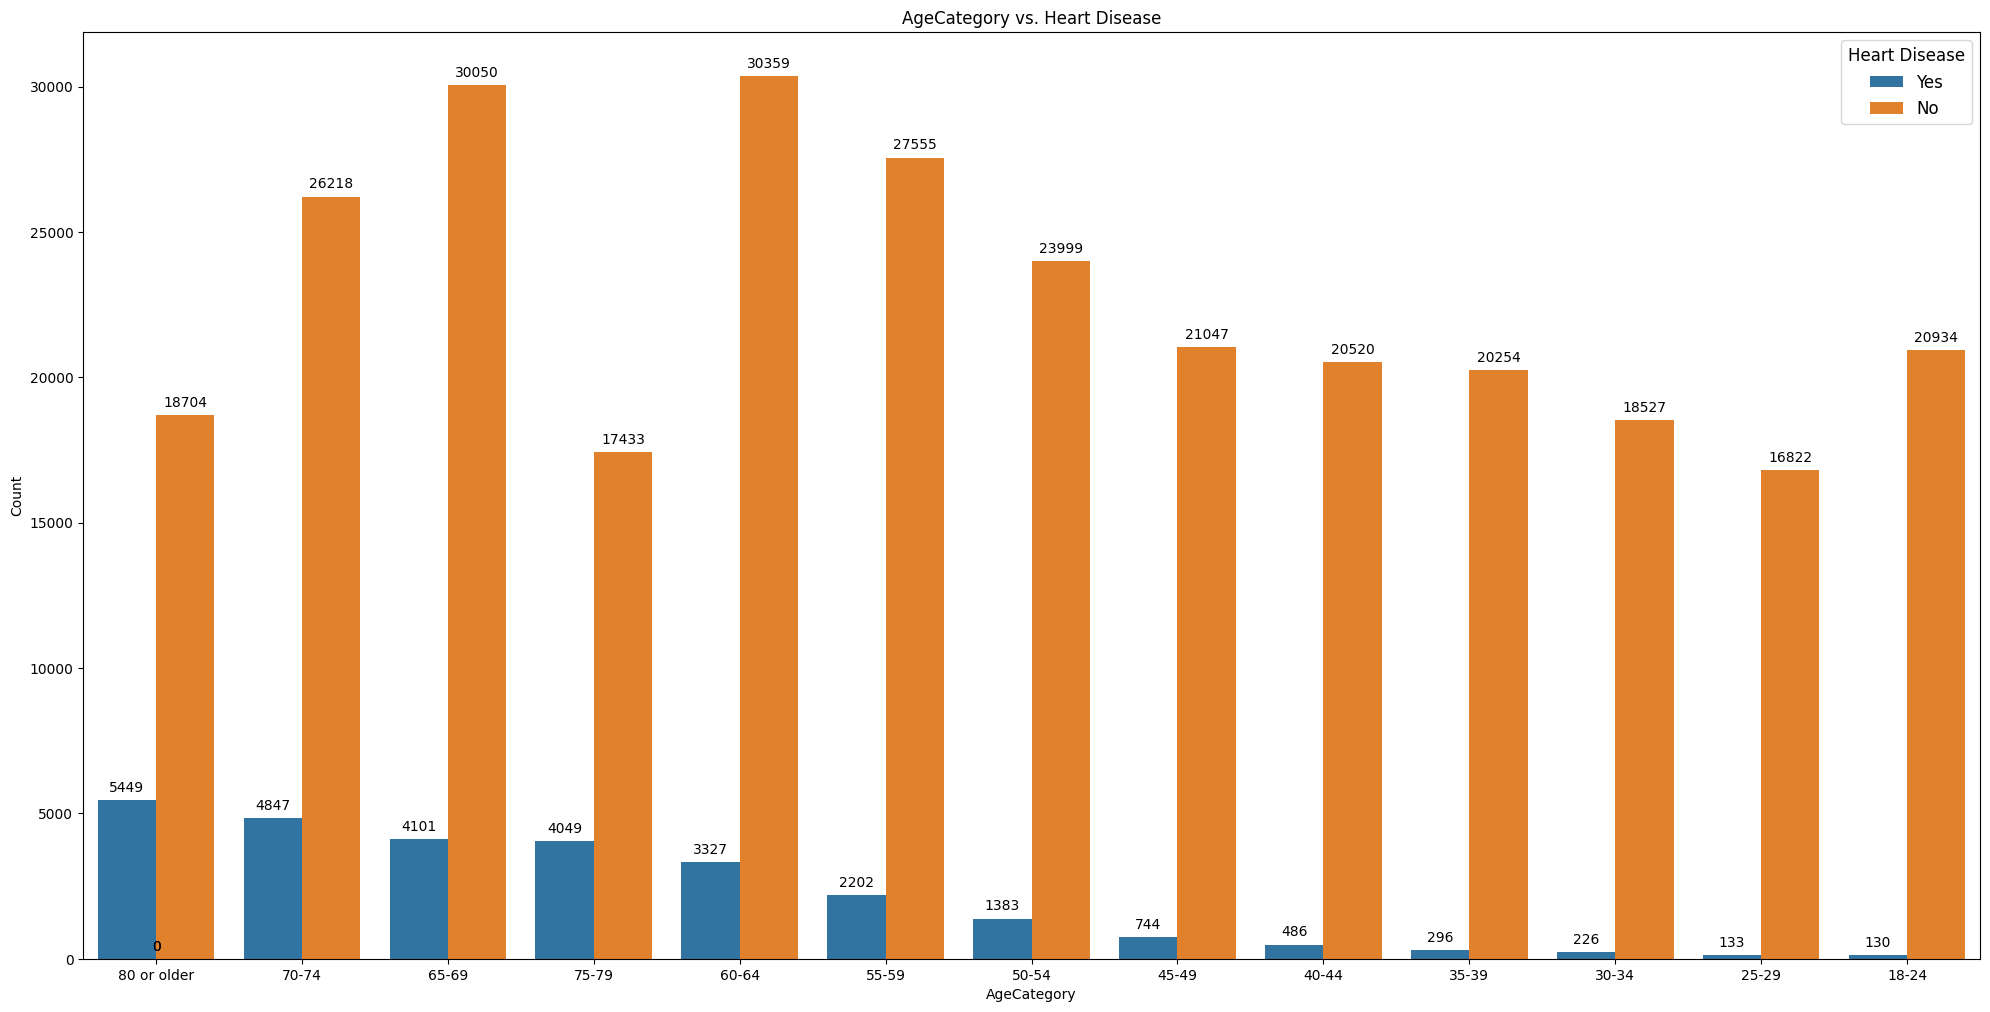

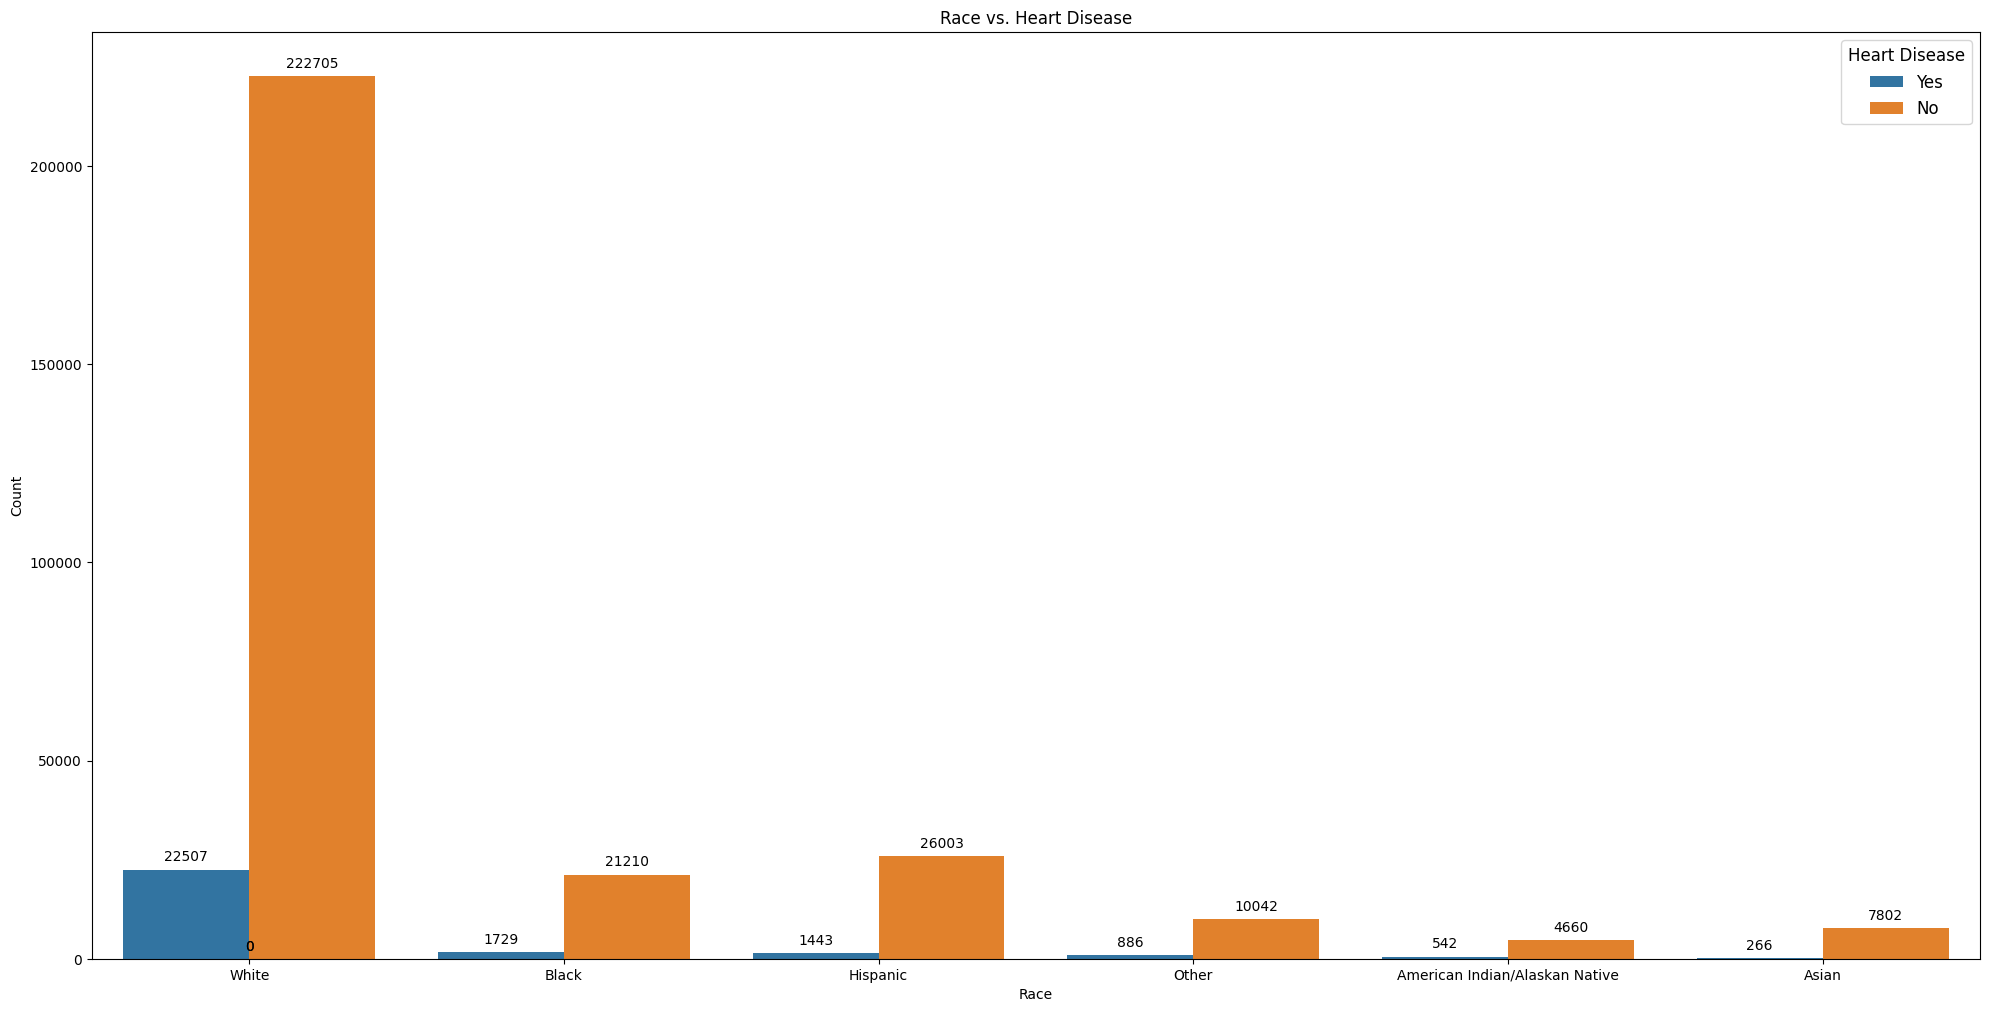

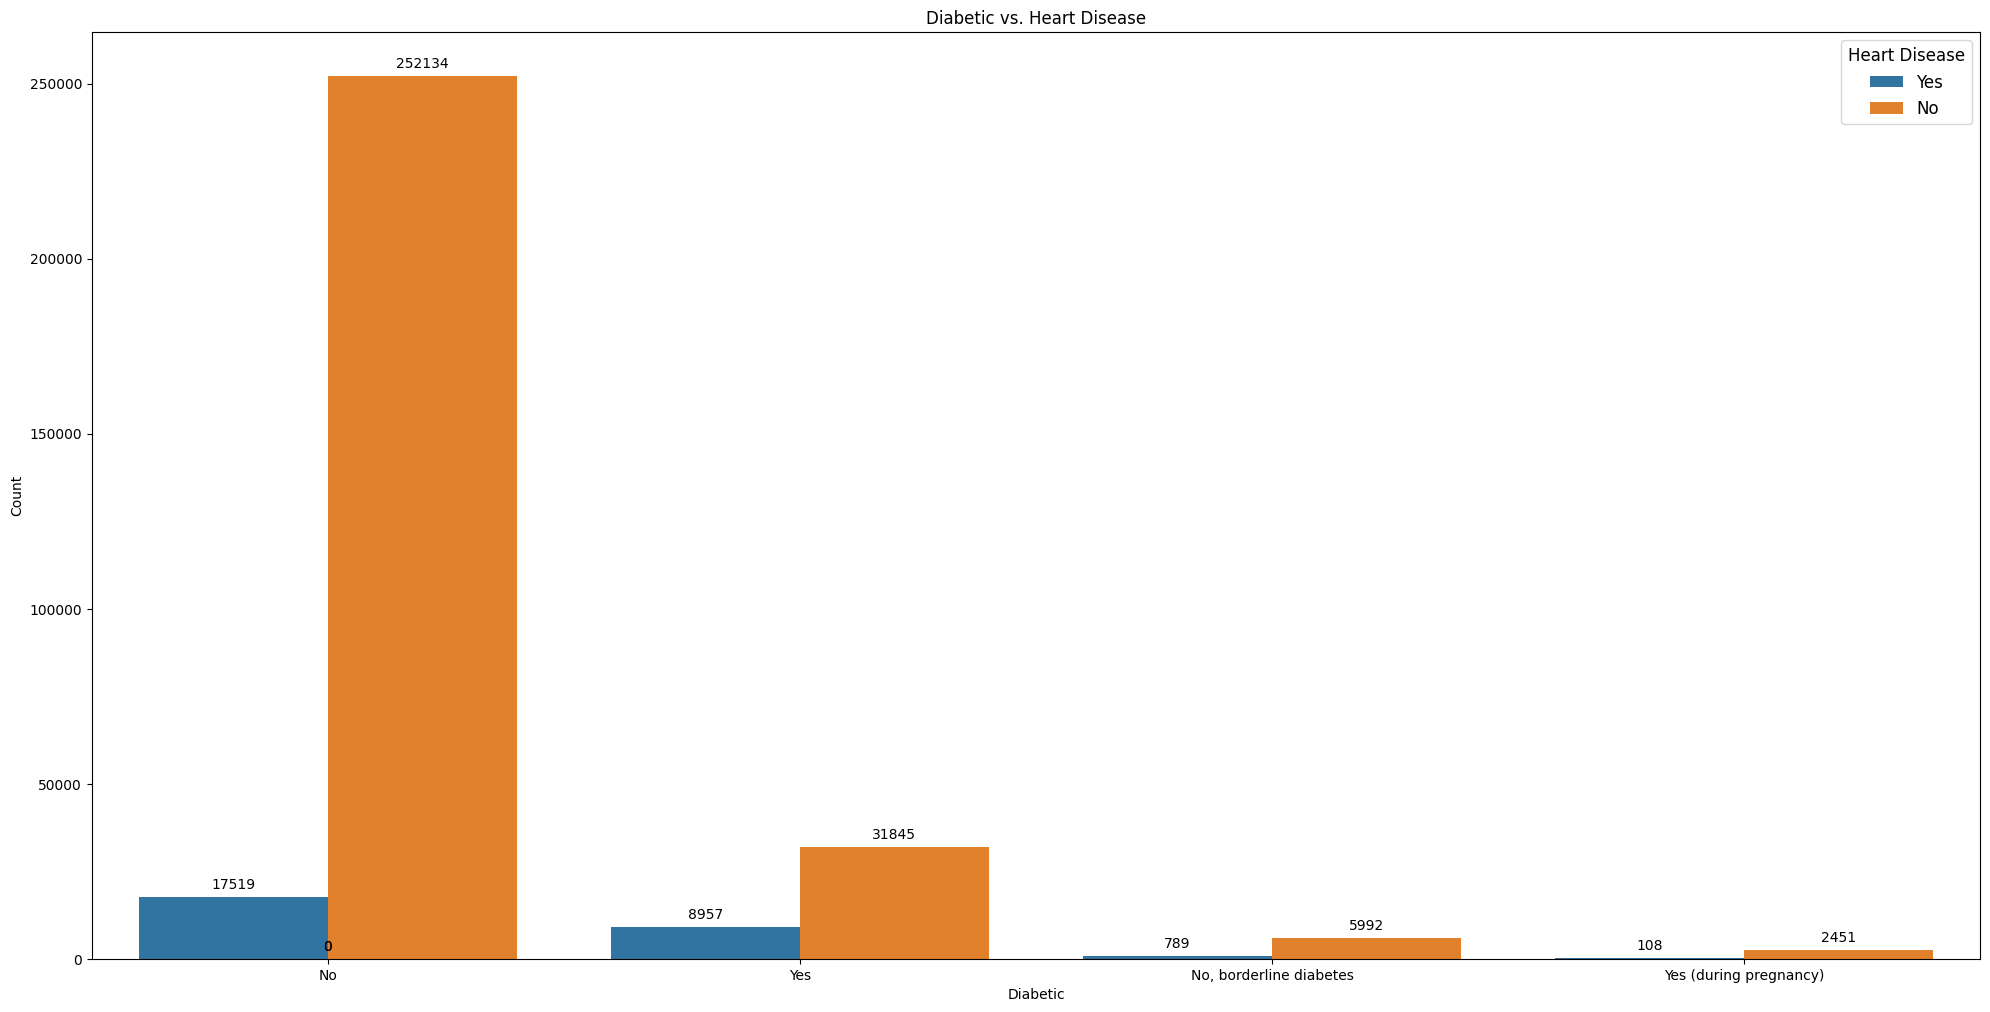

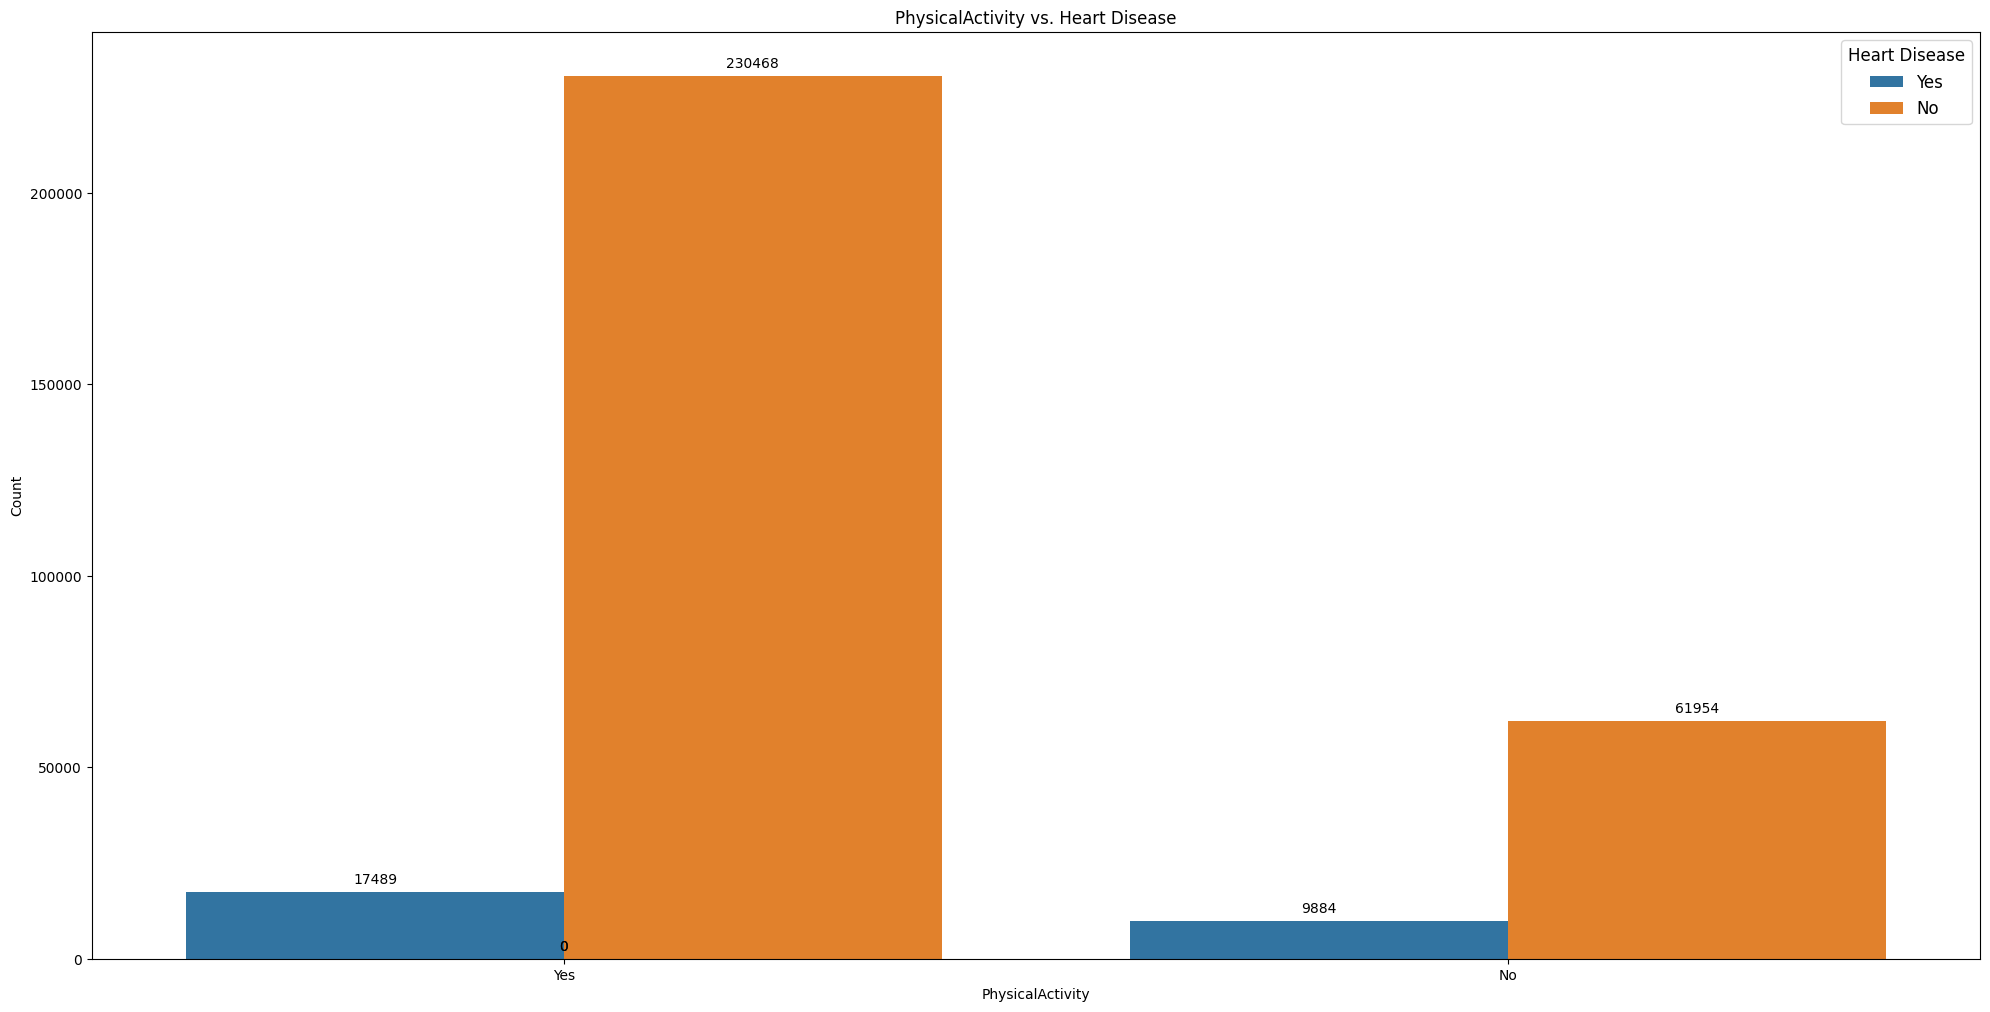

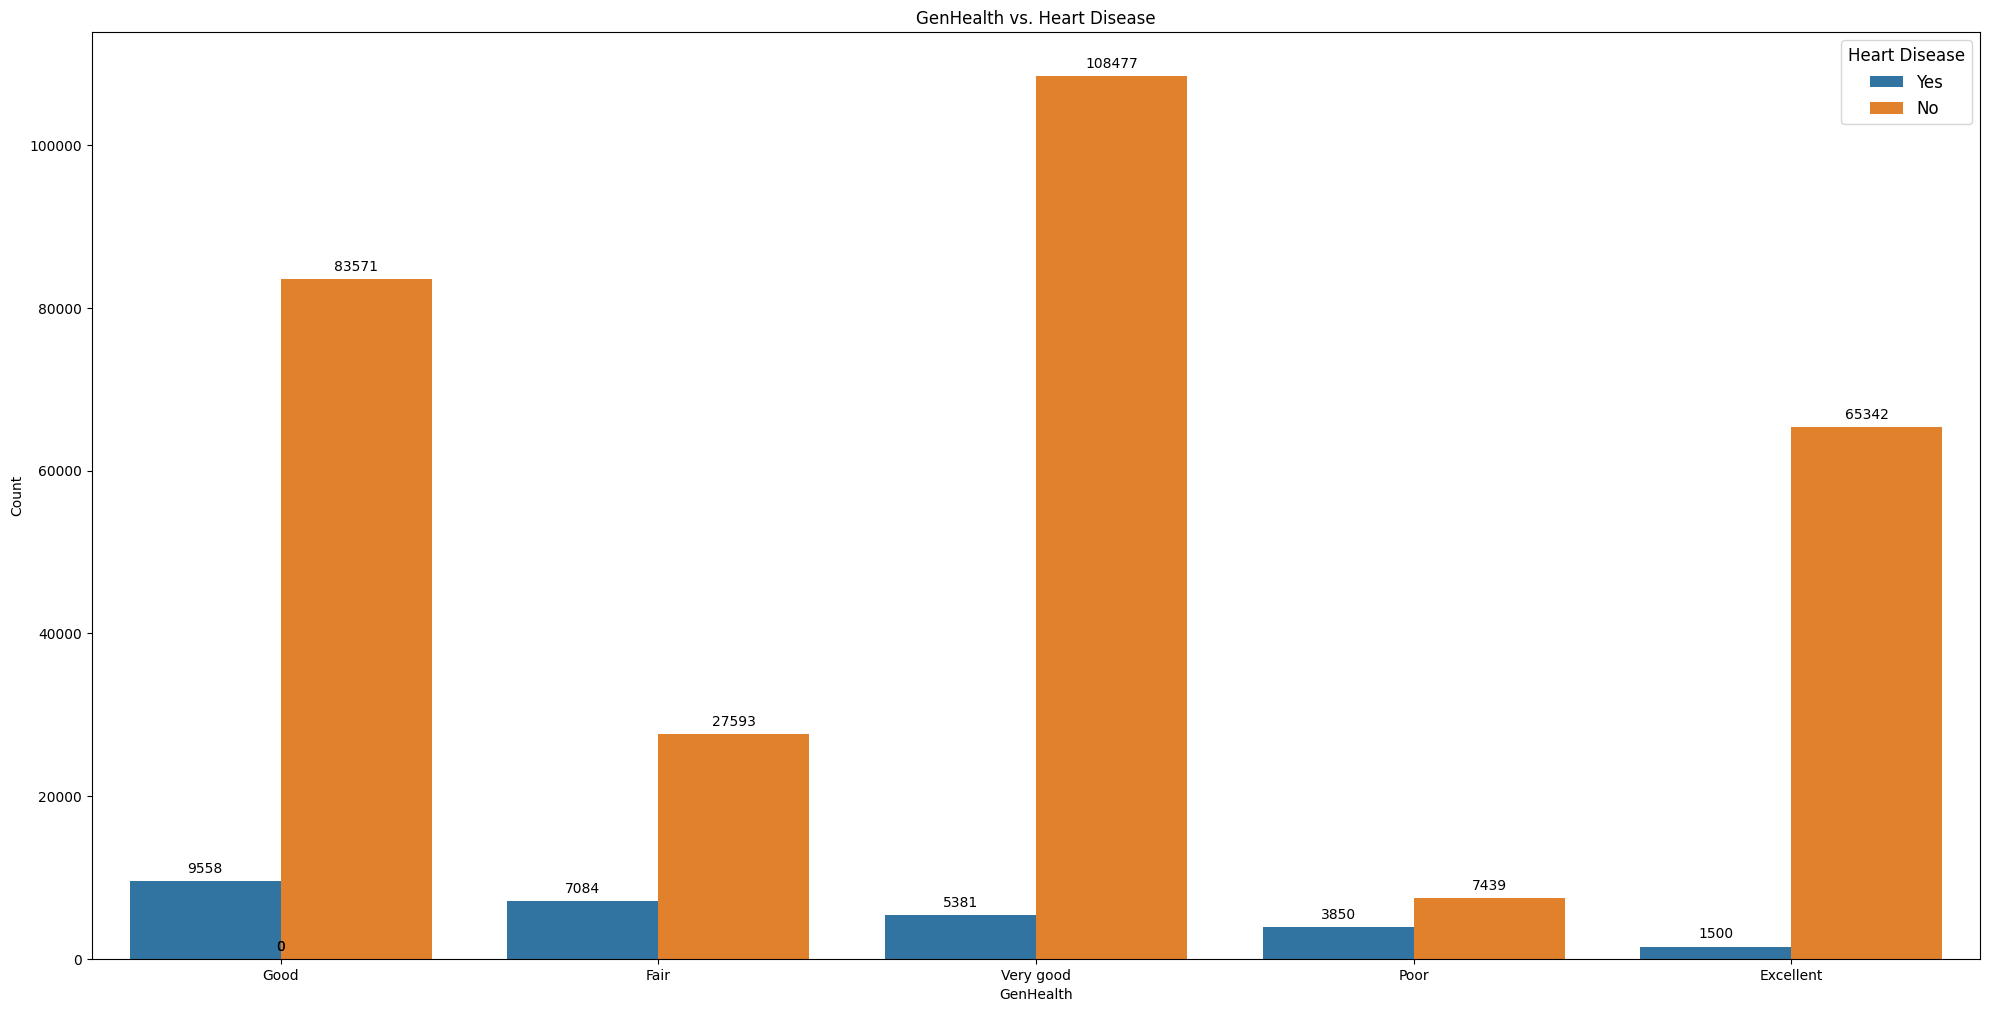

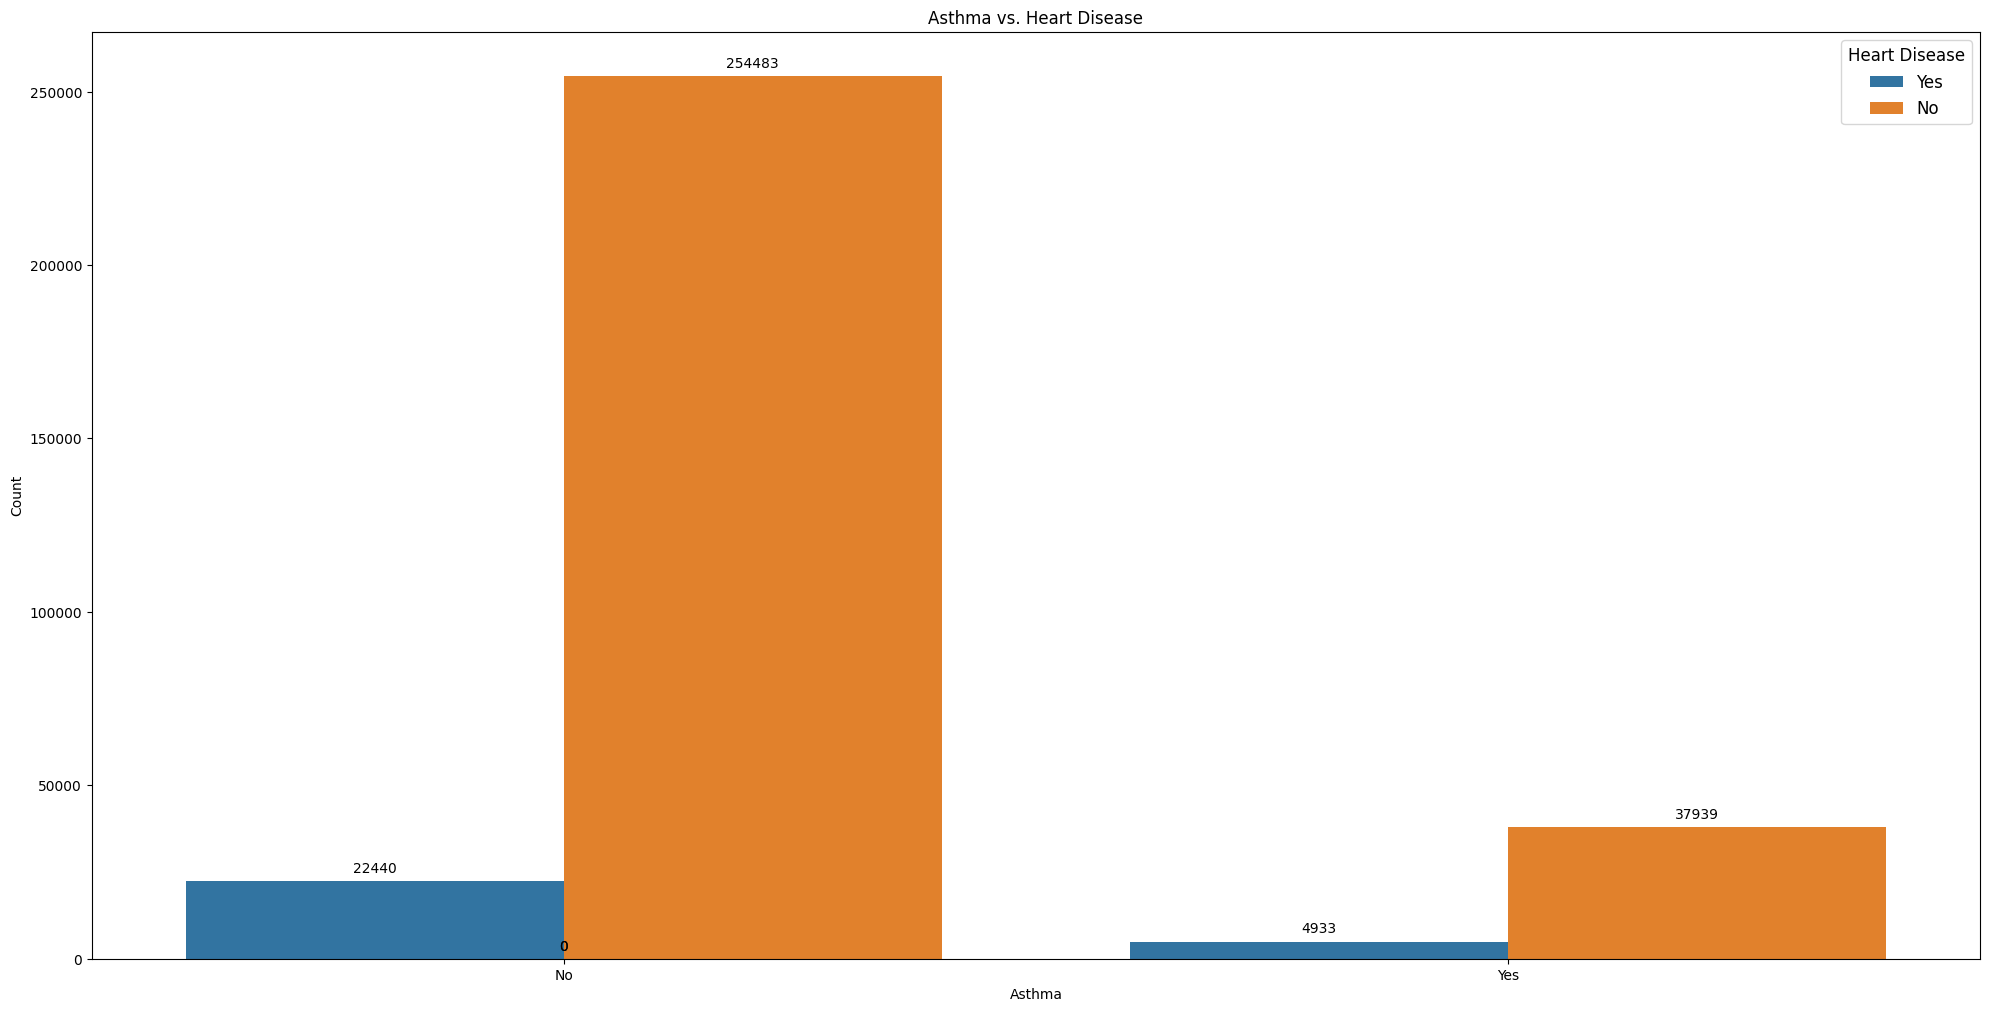

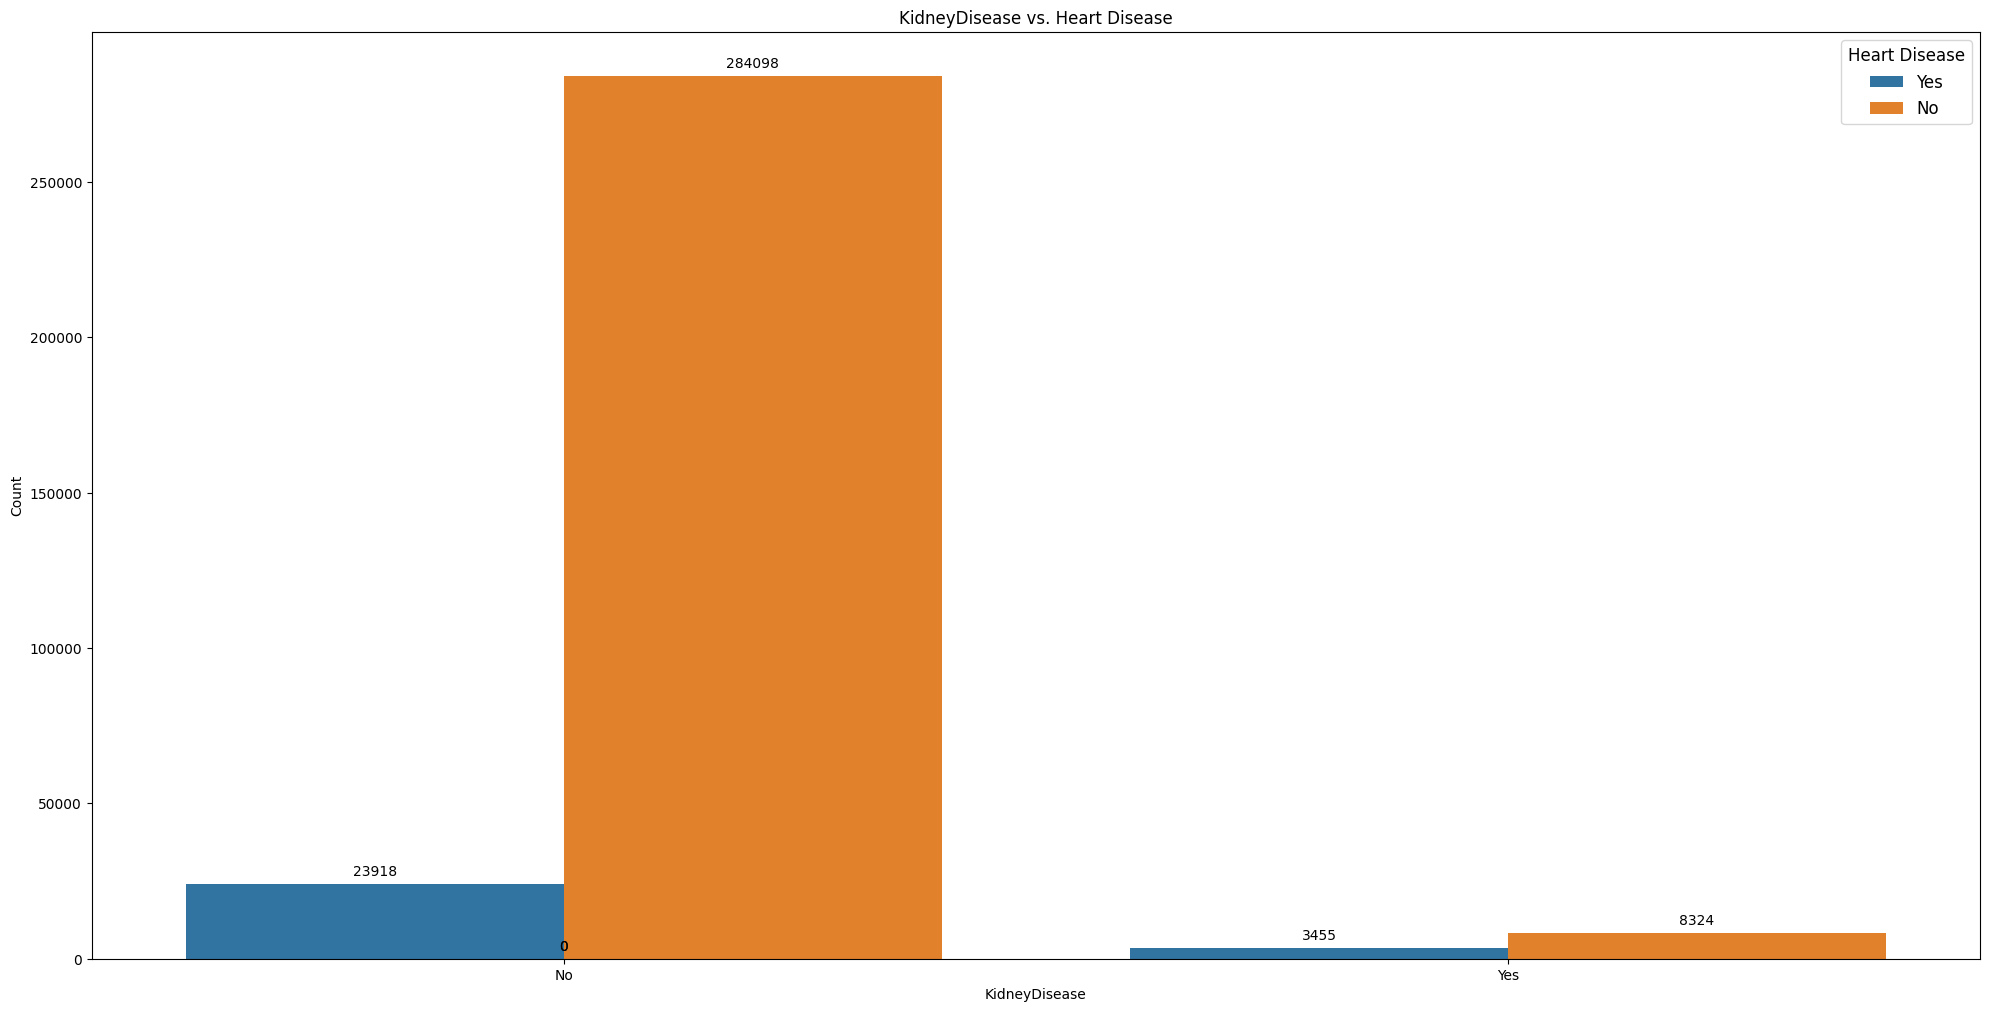

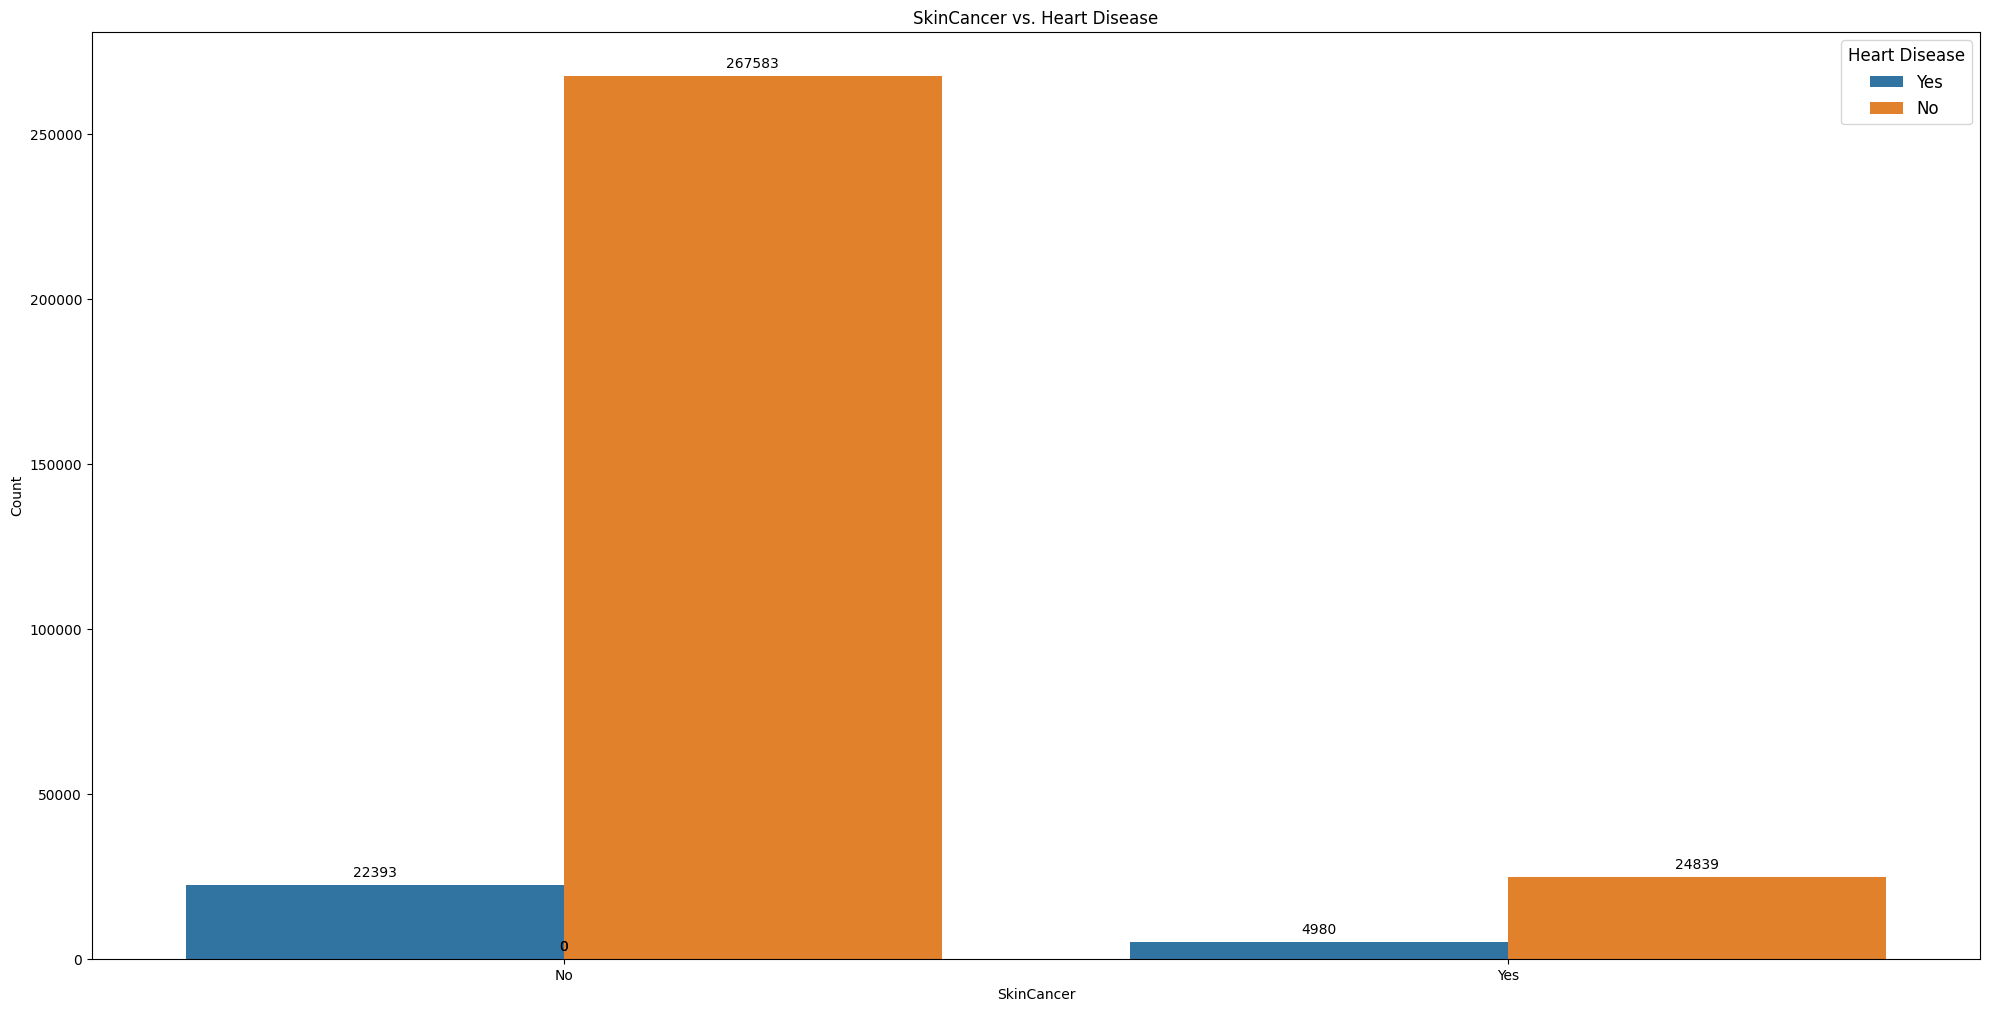

In [188]:
for variable in categorical_features:
    if variable == 'HeartDisease':
      continue

    fig, ax1 = plt.subplots(figsize=(20,10))

    # Count the number of smokers and non-smokers with and without heart disease
    x1 = df[variable][df['HeartDisease'] == 'Yes'].value_counts().reset_index()
    x1.columns = [variable, 'Count']
    x1['HeartDisease'] = 'Yes'

    x2 = df[variable][df['HeartDisease'] == 'No'].value_counts().reset_index()
    x2.columns = [variable, 'Count']
    x2['HeartDisease'] = 'No'

    # Concatenate the two dataframes
    data = pd.concat([x1, x2])

    # Create a single bar plot with hue for HeartDisease
    sns.barplot(x=variable, y='Count', hue='HeartDisease', data=data, ax=ax1)

    # Add value labels on top of the bars
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', #horizontal and vertical alignment
                    xytext = (0, 9),  # Move the text slightly above the bar
                    textcoords = 'offset points')

    plt.tight_layout()
    plt.title(f'{variable} vs. Heart Disease')
    # Increase the size of the legend
    ax1.legend(title='Heart Disease', fontsize='large', title_fontsize='large')  # Adjust as needed
    plt.show()

#MULTIVARIATE ANALYSIS

In [189]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[categorical_features])
df[categorical_features] = enc.transform(df[categorical_features])


#NUMERICAL FEATURES

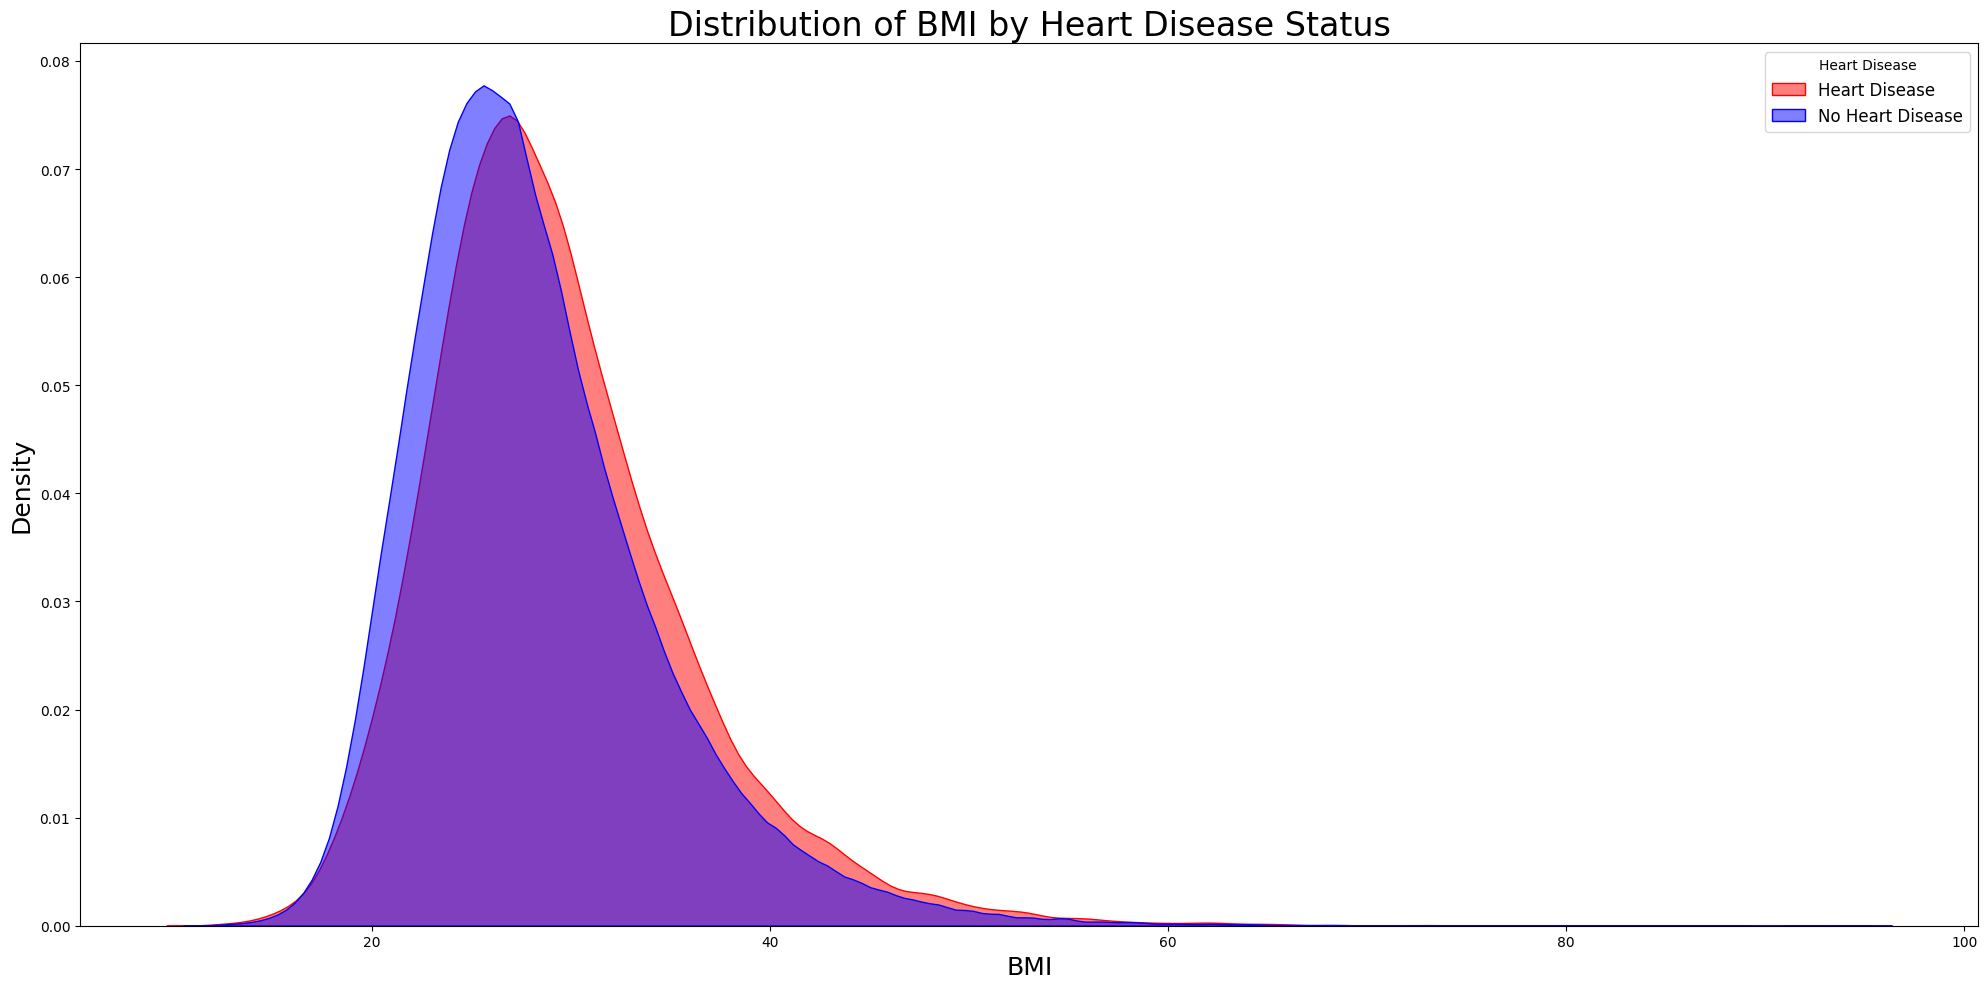

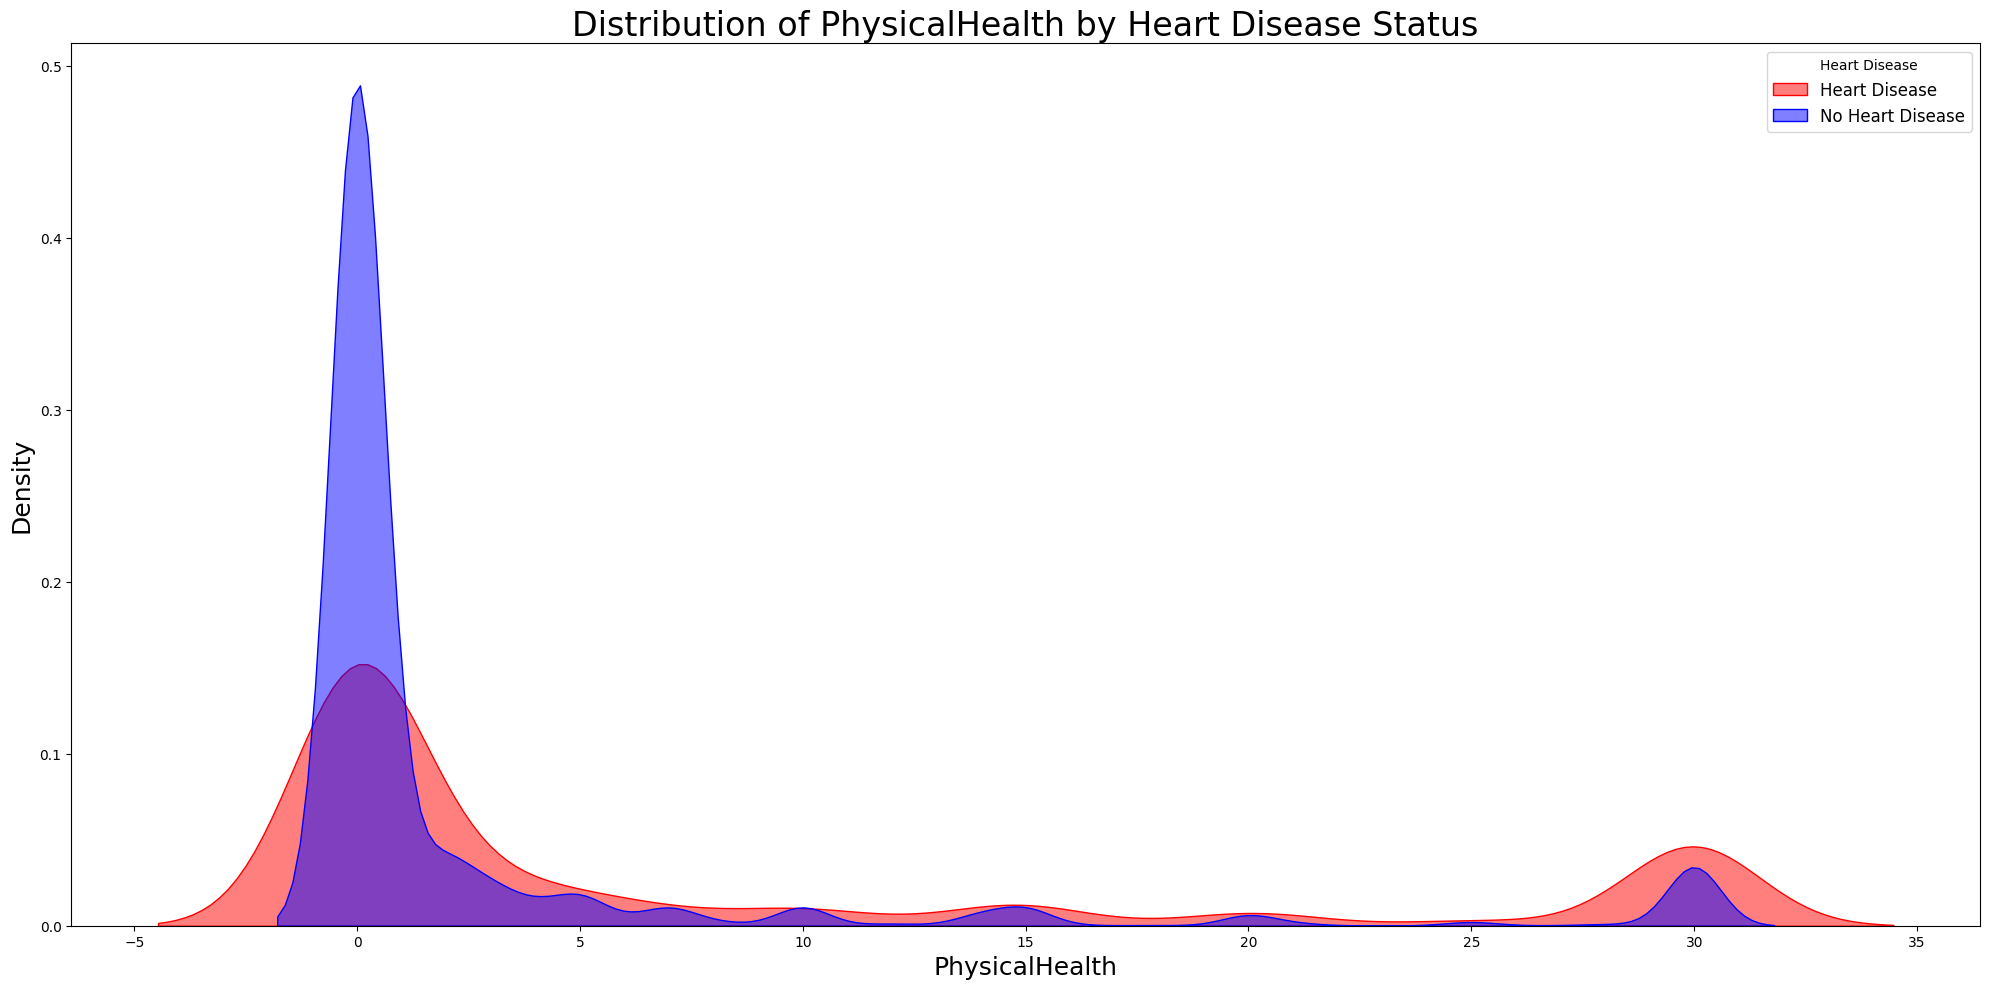

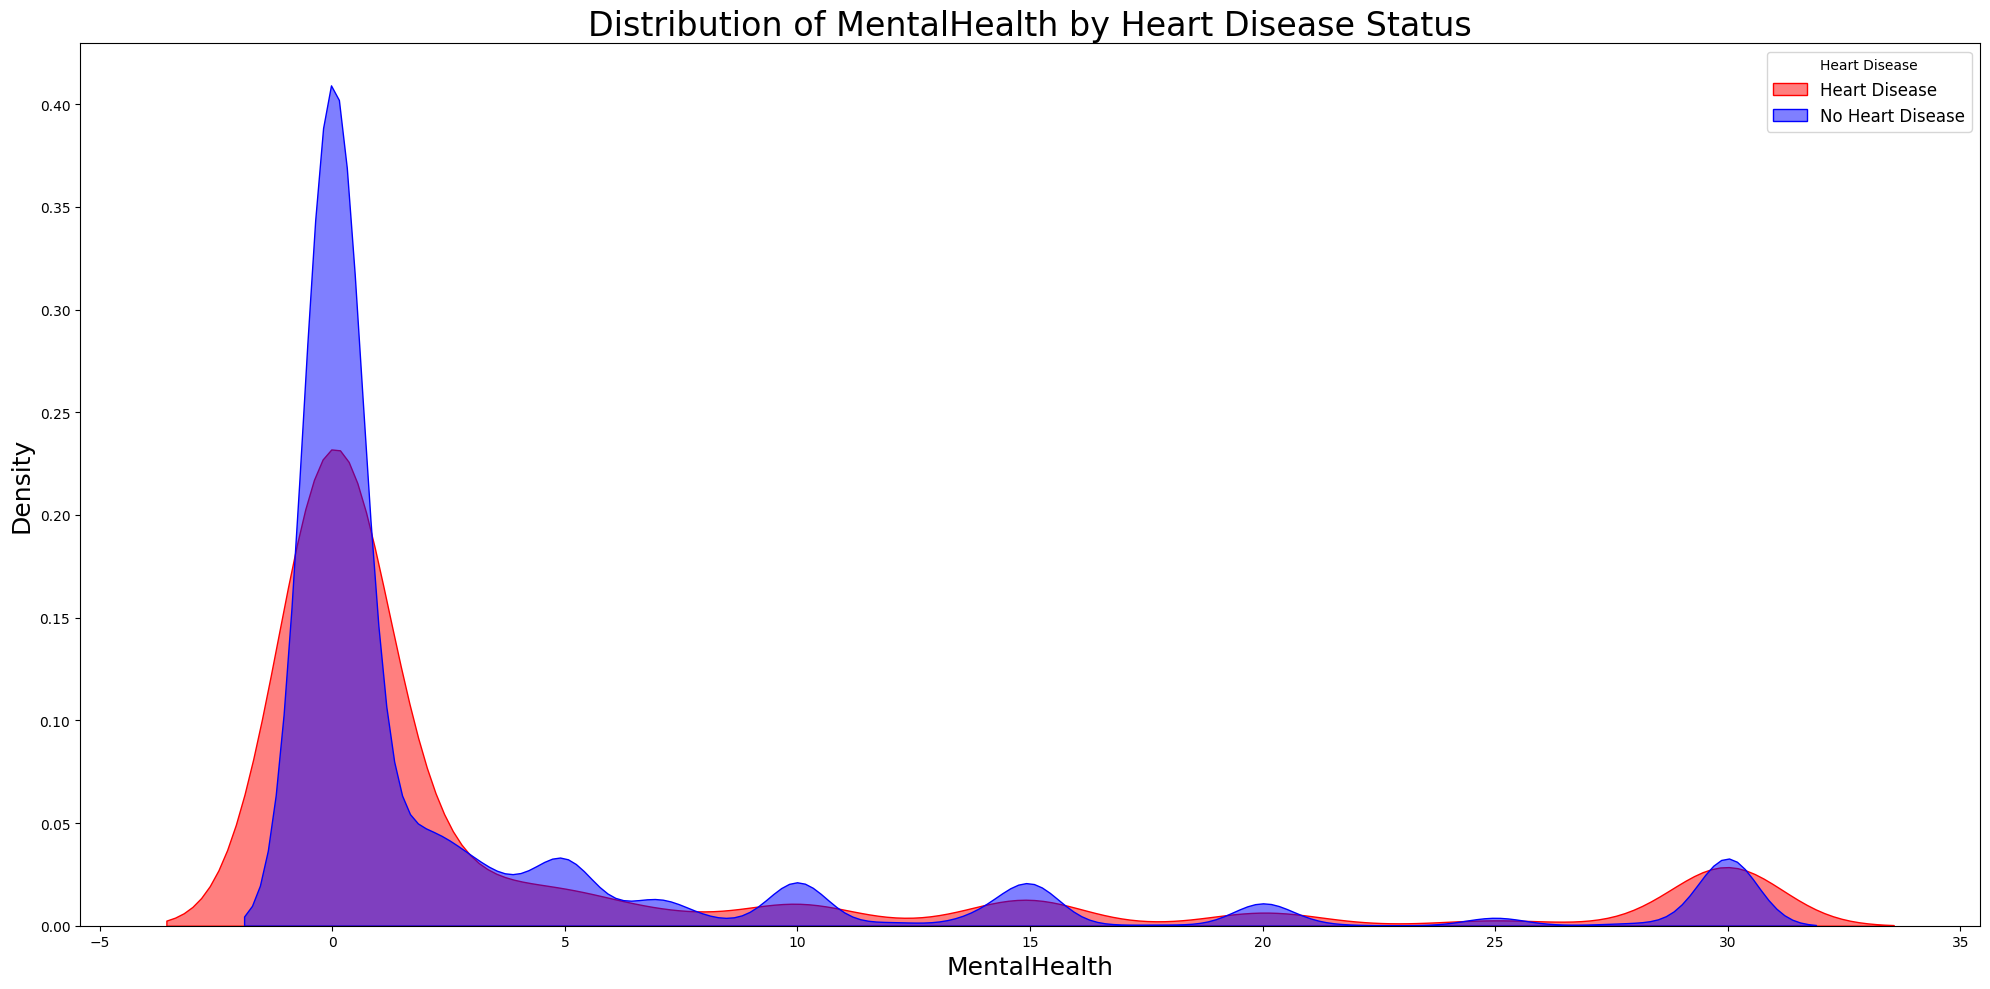

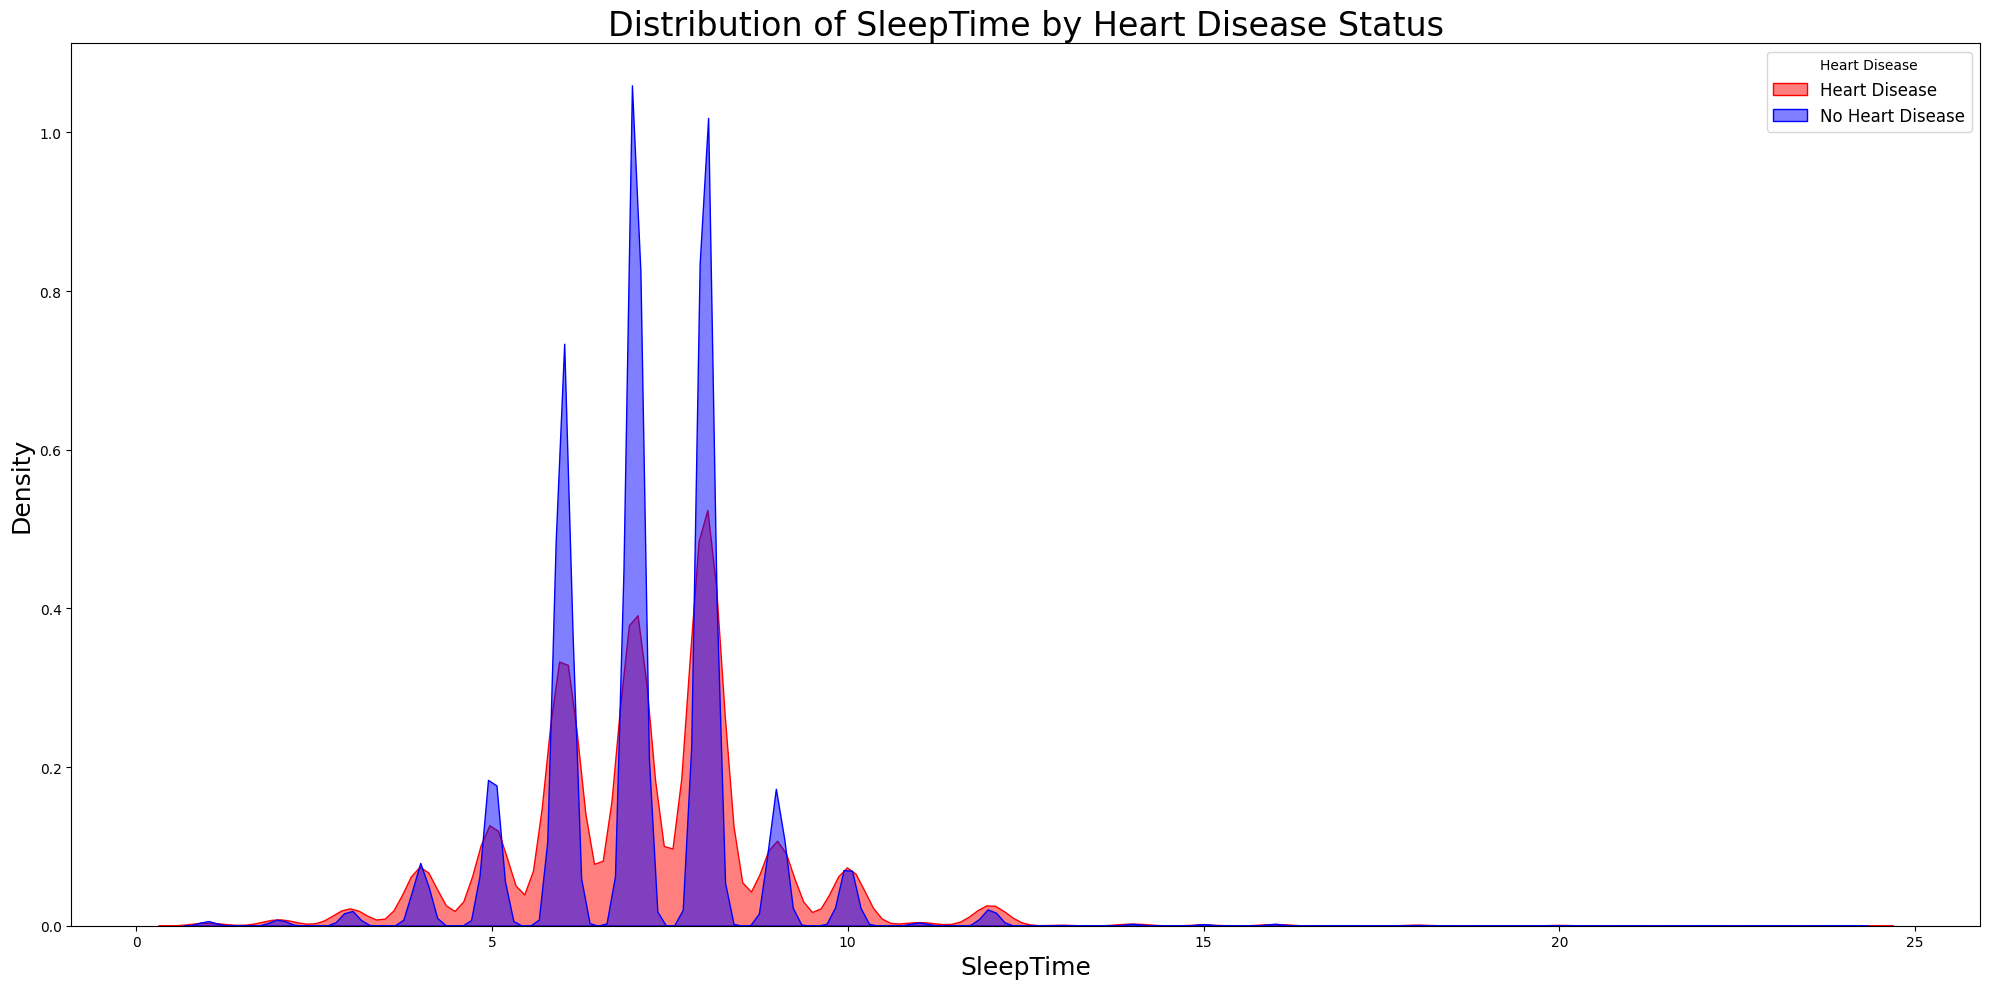

In [190]:
for variable in numerical_features:
    if variable == 'HeartDisease':
      continue
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot KDE for Heart Disease (1) and No Heart Disease (0)
    sns.kdeplot(df[variable][df['HeartDisease'] == 1], ax=ax1, label='Heart Disease', color='red', fill=True, alpha=0.5)
    sns.kdeplot(df[variable][df['HeartDisease'] == 0], ax=ax1, label='No Heart Disease', color='blue', fill=True, alpha=0.5)

    # Set title and labels
    ax1.set_title(f'Distribution of {variable} by Heart Disease Status', fontsize=24)
    ax1.set_xlabel(variable, fontsize=18)
    ax1.set_ylabel('Density', fontsize=18)

    # Increase the size of the legend
    ax1.legend(title='Heart Disease', fontsize='large', title_fontsize='medium')

    plt.tight_layout()
    plt.show()


In [191]:
#numerical_features does not look normal
#checking for p values

# Import necessary libraries
from scipy.stats import shapiro

# Shapiro-Wilk Test for Normality
for feature in numerical_features:
    stat, p = shapiro(df[feature])
    print(f'Feature: {feature}')
    print(f'Statistics= {stat:.3f}, p= {p:.3f}')

    # Interpret the results
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    print('\n')  # Add a newline for better separation of outputs


Feature: BMI
Statistics= 0.928, p= 0.000
Sample does not look Gaussian (reject H0)


Feature: PhysicalHealth
Statistics= 0.476, p= 0.000
Sample does not look Gaussian (reject H0)


Feature: MentalHealth
Statistics= 0.551, p= 0.000
Sample does not look Gaussian (reject H0)


Feature: SleepTime
Statistics= 0.890, p= 0.000
Sample does not look Gaussian (reject H0)




#Categorical Features


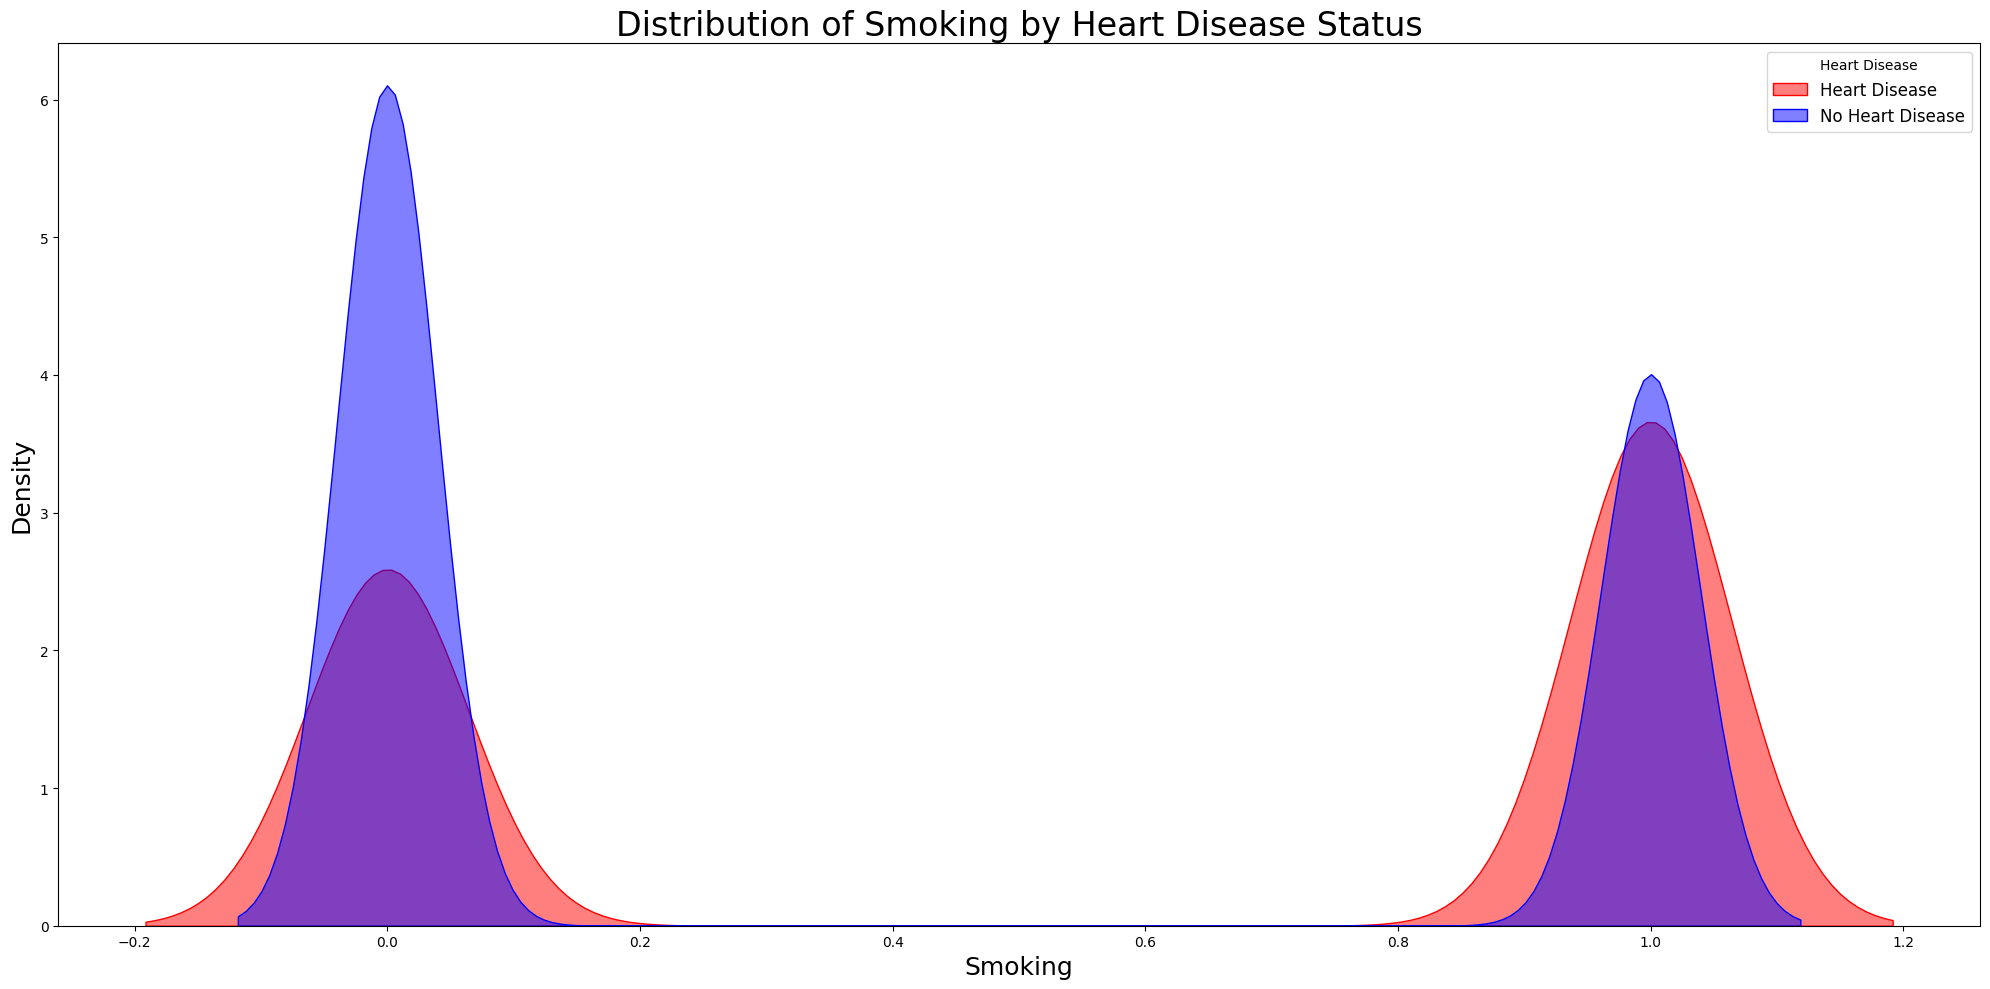

In [ ]:
for variable in categorical_features:
    if variable == 'HeartDisease':
      continue
    fig, ax1 = plt.subplots(figsize=(20, 10))

    # Plot KDE for Heart Disease (1) and No Heart Disease (0)
    sns.kdeplot(df[variable][df['HeartDisease'] == 1], ax=ax1, label='Heart Disease', color='red', fill=True, alpha=0.5)
    sns.kdeplot(df[variable][df['HeartDisease'] == 0], ax=ax1, label='No Heart Disease', color='blue', fill=True, alpha=0.5)

    # Set title and labels
    ax1.set_title(f'Distribution of {variable} by Heart Disease Status', fontsize=24)
    ax1.set_xlabel(variable, fontsize=18)
    ax1.set_ylabel('Density', fontsize=18)

    # Increase the size of the legend
    ax1.legend(title='Heart Disease', fontsize='large', title_fontsize='medium')

    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
    if feature == 'HeartDisease':
      continue

    stat, p, dof, expected = chi2_contingency(pd.crosstab(df[feature],df['HeartDisease']))
  # interpret p-value
    alpha = 0.05
    print(f'Feature: {feature}')
    print ( "p value is " + str (p))
    if p<=alpha:
      print ( 'Dependent (reject H0)' )
    else :
      print ( 'Independent (H0 holds true)' )
    print('\n')

In [ ]:
correlation = df.corr()
x=correlation['HeartDisease'].sort_values(ascending = False)
x=x[1:]
sns.barplot(x=x.index,y=x)
plt.xticks(rotation = 90)
plt.show()
#likely hood/relation of heart disease for various factors

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:

# Calculate correlation with respect to 'HeartDisease'
correlation = df.corr()  # Compute the correlation matrix
k = len(df.columns)  # Get the number of columns

# Select the top k features correlated with 'HeartDisease'
cols = correlation.nlargest(k, 'HeartDisease')['HeartDisease'].index
print(cols)

# Generate the correlation matrix for the selected columns
cm = correlation.loc[cols, cols]  # Use .loc to get only the relevant subset

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cm, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm,
             mask=mask,
             vmax=0.8,
             linewidths=0.01,
             square=True,
             annot=True,
             cmap='viridis',
             linecolor="white",
             xticklabels=cols,
             yticklabels=cols,
             annot_kws={'size': 8})

# Add a title
plt.title('Correlation Heatmap', fontsize=18)

# Show the plot
plt.show()


#the first column will show how strongly they are related to the likeliness of possile heart disease.